In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('clustered_data_v2.csv')

# Step 2: Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values if any (assuming no missing values for this example)
# df = df.dropna()

# Step 3: Exploratory Data Analysis (EDA)
# Descriptive statistics
print(df.describe())

# # Pairplot to understand relationships between variables
# sns.pairplot(df, hue='cluster_all_data', diag_kind='kde')
# plt.show()

# # Heatmap to show correlation between variables
# plt.figure(figsize=(14, 8))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()


price                          0
bedrooms                       0
bathrooms                      0
sqft_lot_normalized            0
floors                         0
waterfront                     0
view                           0
condition                      0
yr_built                       0
yr_renovated                   0
zipcode                        0
lat                            0
long                           0
nearest_station_distance_km    0
bathroom_category              0
density                        0
commute_time                   0
distance_to_point_km           0
is_near_shore                  0
grade_living_normalized        0
bedrooms_cat                   0
lot_size_category              0
grade_living_category          0
outliers_ecod                  0
cluster_all_data               0
cluster_no_outlier             0
sqft_lot                       0
grade_living                   0
dtype: int64
              price      bedrooms     bathrooms  sqft_lot_norma

In [15]:
print(df.dtypes)


price                          float64
bedrooms                         int64
bathrooms                      float64
sqft_lot_normalized            float64
floors                         float64
waterfront                       int64
view                             int64
condition                        int64
yr_built                         int64
yr_renovated                     int64
zipcode                          int64
lat                            float64
long                           float64
nearest_station_distance_km    float64
bathroom_category               object
density                        float64
commute_time                   float64
distance_to_point_km           float64
is_near_shore                     bool
grade_living_normalized        float64
bedrooms_cat                    object
lot_size_category                int64
grade_living_category            int64
outliers_ecod                    int64
cluster_all_data                 int64
cluster_no_outlier       

In [16]:
# Kategorik alanları seçme
categorical_columns = ['bathroom_category', 'bedrooms_cat', 'is_near_shore', ]

# Tek sıcaklık kodlama (One-Hot Encoding) işlemi
df = pd.get_dummies(df, columns=categorical_columns)

# Sonuçları kontrol etme
print(df.head())

# Güncellenmiş veri tiplerini görme
print(df.dtypes)


      price  bedrooms  bathrooms  sqft_lot_normalized  floors  waterfront  \
0  221900.0         3       1.00             8.639588     1.0           0   
1  538000.0         3       2.25             8.887791     2.0           0   
2  180000.0         2       1.00             9.210440     1.0           0   
3  604000.0         4       3.00             8.517393     1.0           0   
4  510000.0         3       2.00             8.997271     1.0           0   

   view  condition  yr_built  yr_renovated  ...  grade_living  \
0     0          3      1955             0  ...          8260   
1     0          3      1951          1991  ...         17990   
2     0          3      1933             0  ...          4620   
3     0          5      1965             0  ...         13720   
4     0          3      1987             0  ...         13440   

   bathroom_category_+3 Bathrooms  bathroom_category_1-2 Bathrooms  \
0                           False                            False   
1     

In [17]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot_normalized', 'floors',
       'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'nearest_station_distance_km', 'density',
       'commute_time', 'distance_to_point_km', 'grade_living_normalized',
       'lot_size_category', 'grade_living_category', 'outliers_ecod',
       'cluster_all_data', 'cluster_no_outlier', 'sqft_lot', 'grade_living',
       'bathroom_category_+3 Bathrooms', 'bathroom_category_1-2 Bathrooms',
       'bathroom_category_2-3 Bathrooms',
       'bathroom_category_Studio or 1 Bathroom', 'bedrooms_cat_3-4',
       'bedrooms_cat_<3', 'bedrooms_cat_>4', 'is_near_shore_False',
       'is_near_shore_True'],
      dtype='object')

In [18]:
# Silinecek sütunların listesi
columns_to_drop_cat = [
    'lot_size_category', 'grade_living_category', 
    'bathroom_category_+3 Bathrooms', 'bathroom_category_1-2 Bathrooms',
    'bathroom_category_2-3 Bathrooms', 'bathroom_category_Studio or 1 Bathroom', 
    'bedrooms_cat_3-4', 'bedrooms_cat_<3', 'bedrooms_cat_>4','sqft_lot','grade_living','cluster_no_outlier','waterfront'
]

columns_to_drop_main = [
'bedrooms', 'bathrooms','sqft_lot','grade_living','grade_living_category','waterfront'
]
df_wo_cat= df.drop(columns=columns_to_drop_cat)
df_wo_main= df.drop(columns=columns_to_drop_main)


In [19]:
print(df_wo_cat.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot_normalized', 'floors',
       'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'nearest_station_distance_km', 'density', 'commute_time',
       'distance_to_point_km', 'grade_living_normalized', 'outliers_ecod',
       'cluster_all_data', 'is_near_shore_False', 'is_near_shore_True'],
      dtype='object')


In [20]:
print(df_wo_main.columns)

Index(['price', 'sqft_lot_normalized', 'floors', 'view', 'condition',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'nearest_station_distance_km', 'density', 'commute_time',
       'distance_to_point_km', 'grade_living_normalized', 'lot_size_category',
       'outliers_ecod', 'cluster_all_data', 'cluster_no_outlier',
       'bathroom_category_+3 Bathrooms', 'bathroom_category_1-2 Bathrooms',
       'bathroom_category_2-3 Bathrooms',
       'bathroom_category_Studio or 1 Bathroom', 'bedrooms_cat_3-4',
       'bedrooms_cat_<3', 'bedrooms_cat_>4', 'is_near_shore_False',
       'is_near_shore_True'],
      dtype='object')


In [2]:
# Pairplot to understand relationships between variables
sns.pairplot(df, hue='cluster_all_data', diag_kind='kde')
plt.show()


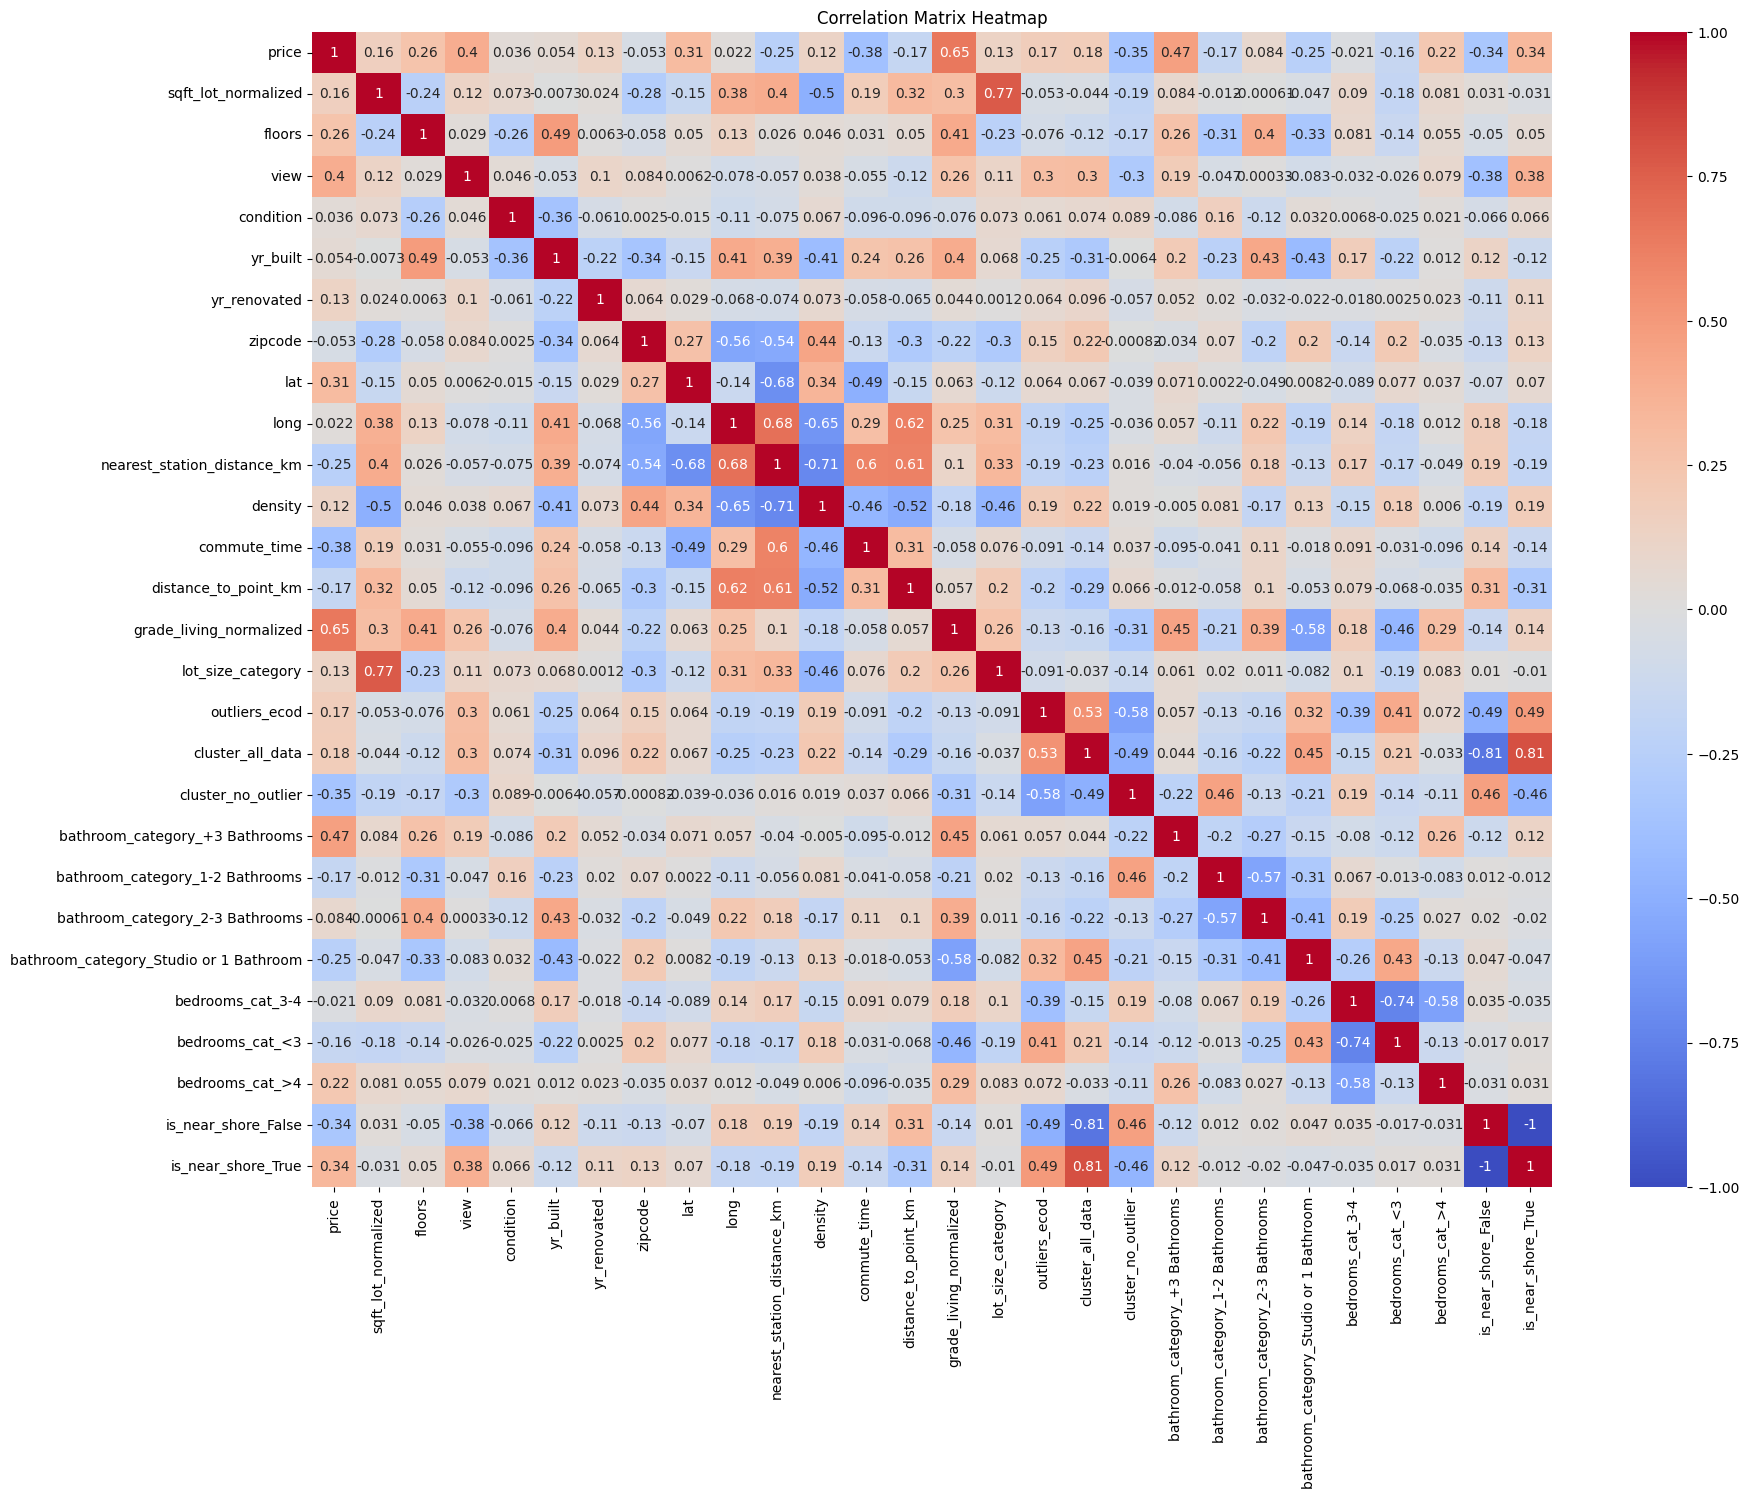

In [23]:
# Heatmap to show correlation between variables
plt.figure(figsize=(20, 15))
correlation_matrix = df_wo_main.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

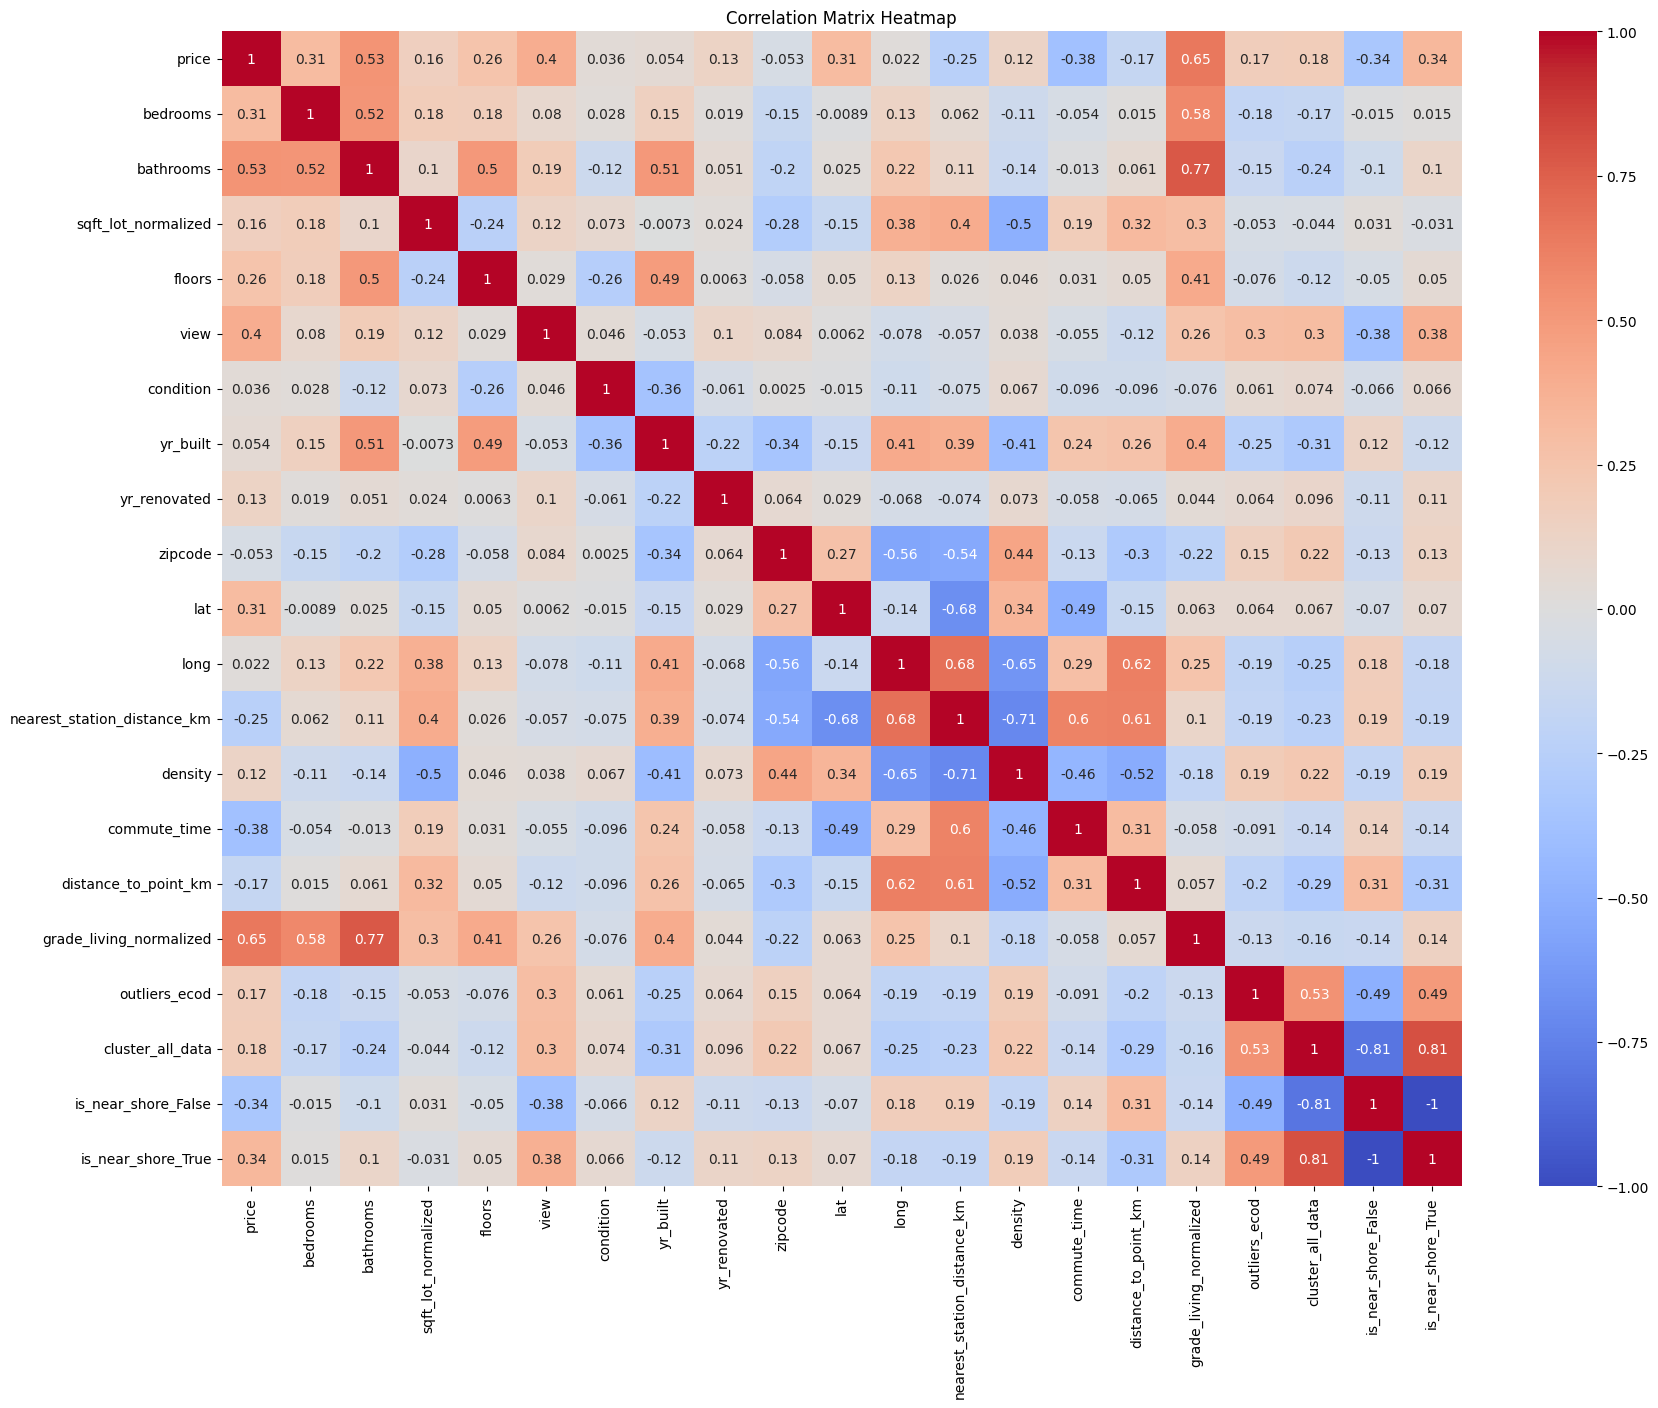

In [24]:
# Heatmap to show correlation between variables
plt.figure(figsize=(20, 15))
correlation_matrix = df_wo_cat.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 1. Linear regression


In [26]:
from sklearn.model_selection import train_test_split

# Bağımlı ve bağımsız değişkenleri ayırma (df_wo_cat için)
X_wo_cat = df_wo_cat[df_wo_cat['cluster_all_data'] == 2].drop('price', axis=1)
y_wo_cat = df_wo_cat[df_wo_cat['cluster_all_data'] == 2]['price']

# Bağımlı ve bağımsız değişkenleri ayırma (df_wo_main için)
X_wo_main = df_wo_main[df_wo_main['cluster_all_data'] == 2].drop('price', axis=1)
y_wo_main = df_wo_main[df_wo_main['cluster_all_data'] == 2]['price']

# Eğitim ve test setlerine ayırma
X_train_wo_cat, X_test_wo_cat, y_train_wo_cat, y_test_wo_cat = train_test_split(X_wo_cat, y_wo_cat, test_size=0.2, random_state=42)
X_train_wo_main, X_test_wo_main, y_train_wo_main, y_test_wo_main = train_test_split(X_wo_main, y_wo_main, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression modeli oluşturma
model_wo_cat = LinearRegression()
model_wo_main = LinearRegression()

# Modelleri eğitme
model_wo_cat.fit(X_train_wo_cat, y_train_wo_cat)
model_wo_main.fit(X_train_wo_main, y_train_wo_main)

# Tahmin yapma
y_pred_wo_cat = model_wo_cat.predict(X_test_wo_cat)
y_pred_wo_main = model_wo_main.predict(X_test_wo_main)

# Performans değerlendirmesi (df_wo_cat için)
mse_wo_cat = mean_squared_error(y_test_wo_cat, y_pred_wo_cat)
r2_wo_cat = r2_score(y_test_wo_cat, y_pred_wo_cat)

# Performans değerlendirmesi (df_wo_main için)
mse_wo_main = mean_squared_error(y_test_wo_main, y_pred_wo_main)
r2_wo_main = r2_score(y_test_wo_main, y_pred_wo_main)

print(f"Performance without categorical columns:\nMSE: {mse_wo_cat}\nR2 Score: {r2_wo_cat}")
print(f"Performance without main columns:\nMSE: {mse_wo_main}\nR2 Score: {r2_wo_main}")


Performance without categorical columns:
MSE: 212479504952.48373
R2 Score: 0.6565446620525762
Performance without main columns:
MSE: 217601072389.8353
R2 Score: 0.6482660768995778


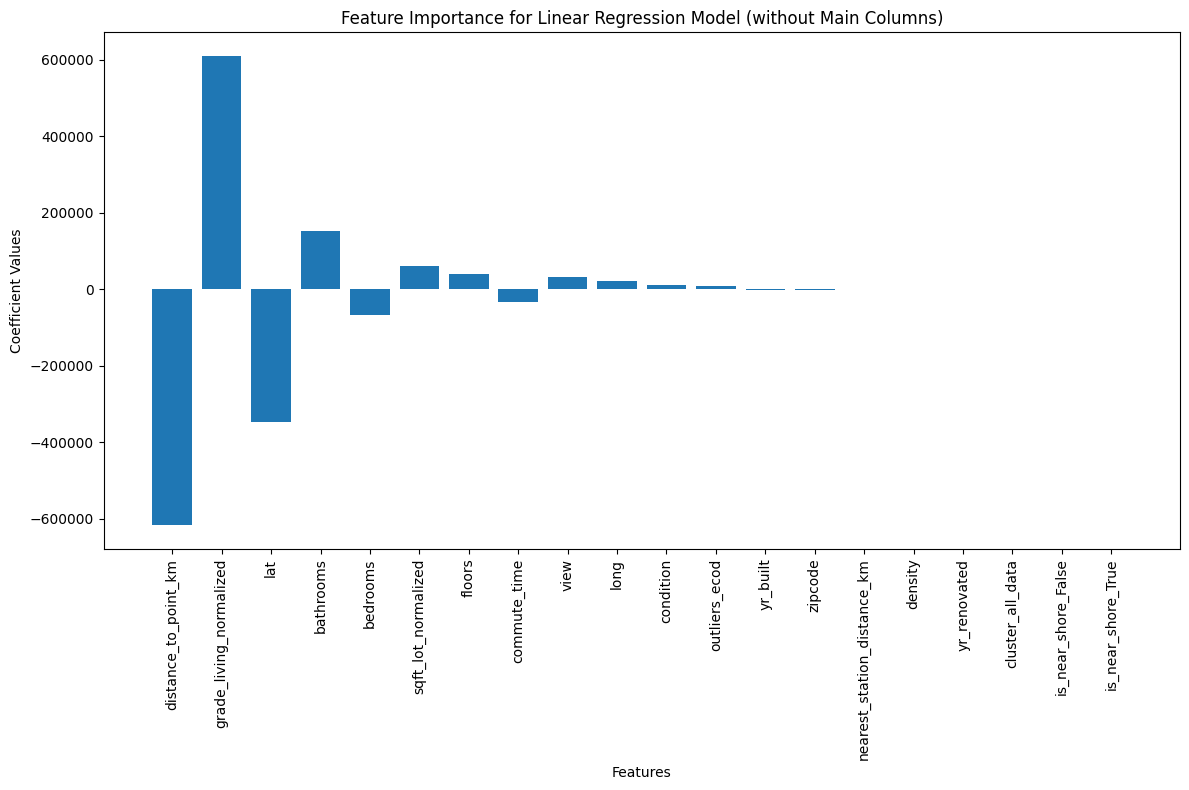

In [29]:
# Özellik katsayılarını alma
coefficients = model_wo_cat.coef_

# Özellik isimlerini alma
feature_names = X_train_wo_cat.columns

# Özellik katsayılarını ve isimlerini eşleştirme
feature_coefficients = dict(zip(feature_names, coefficients))

# Özellik katsayılarını mutlak değerlerine göre sıralama
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Özellik isimlerini ve katsayılarını ayrı listelere ayırma
features = [item[0] for item in sorted_feature_coefficients]
coefficients = [item[1] for item in sorted_feature_coefficients]

# Grafik oluşturma
plt.figure(figsize=(12, 8))
plt.bar(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Feature Importance for Linear Regression Model (without Main Columns)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


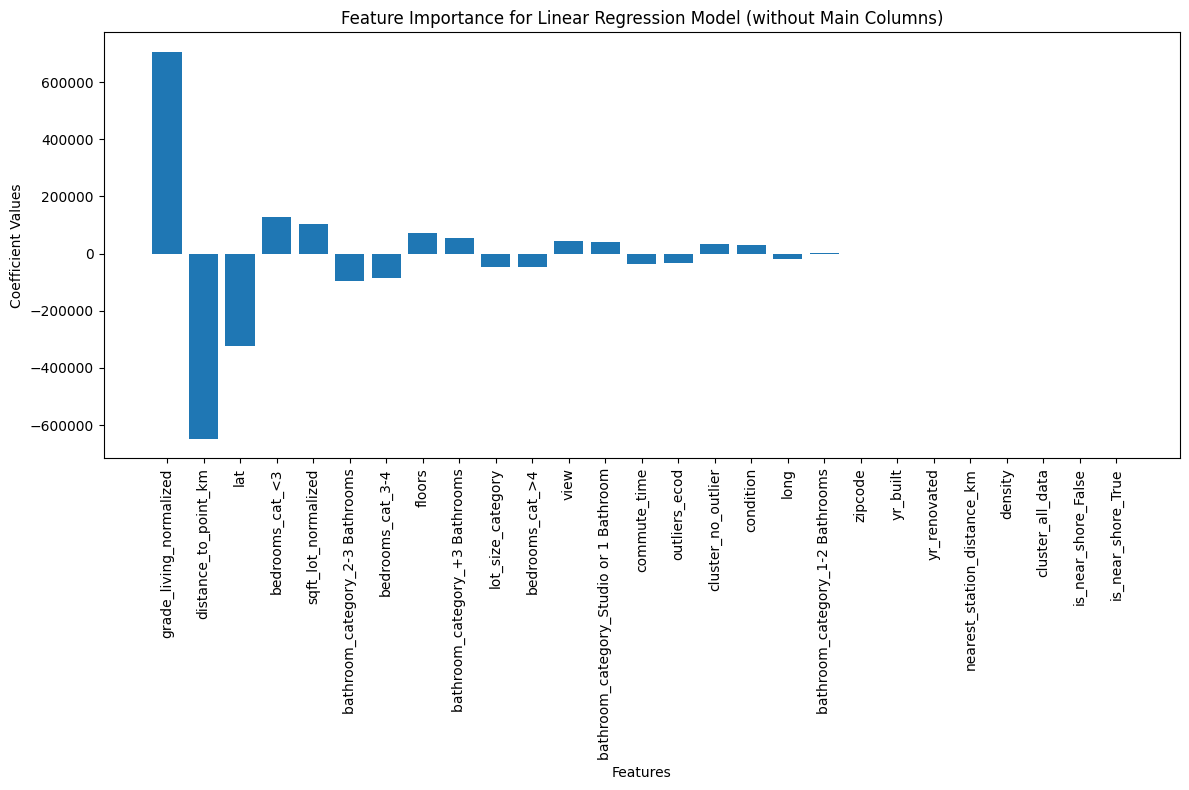

In [32]:
# Özellik katsayılarını alma
coefficients = model_wo_main.coef_

# Özellik isimlerini alma
feature_names = X_train_wo_main.columns

# Özellik katsayılarını ve isimlerini eşleştirme
feature_coefficients = dict(zip(feature_names, coefficients))

# Özellik katsayılarını mutlak değerlerine göre sıralama
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Özellik isimlerini ve katsayılarını ayrı listelere ayırma
features = [item[0] for item in sorted_feature_coefficients]
coefficients = [item[1] for item in sorted_feature_coefficients]

# Grafik oluşturma
plt.figure(figsize=(12, 8))
plt.bar(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Feature Importance for Linear Regression Model (without Main Columns)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [41]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# 1. Ridge Regression


In [42]:
ridge_wo_cat = Ridge()
ridge_wo_main = Ridge()

ridge_wo_cat.fit(X_train_wo_cat, y_train_wo_cat)
ridge_wo_main.fit(X_train_wo_main, y_train_wo_main)

y_pred_ridge_wo_cat = ridge_wo_cat.predict(X_test_wo_cat)
y_pred_ridge_wo_main = ridge_wo_main.predict(X_test_wo_main)

mse_ridge_wo_cat = mean_squared_error(y_test_wo_cat, y_pred_ridge_wo_cat)
r2_ridge_wo_cat = r2_score(y_test_wo_cat, y_pred_ridge_wo_cat)

mse_ridge_wo_main = mean_squared_error(y_test_wo_main, y_pred_ridge_wo_main)
r2_ridge_wo_main = r2_score(y_test_wo_main, y_pred_ridge_wo_main)

print(f"Ridge Regression without categorical columns:\nMSE: {mse_ridge_wo_cat}\nR2 Score: {r2_ridge_wo_cat}")
print(f"Ridge Regression without main columns:\nMSE: {mse_ridge_wo_main}\nR2 Score: {r2_ridge_wo_main}")


Ridge Regression without categorical columns:
MSE: 212101493591.5521
R2 Score: 0.6571556857828216
Ridge Regression without main columns:
MSE: 217327814670.62952
R2 Score: 0.648707775134509


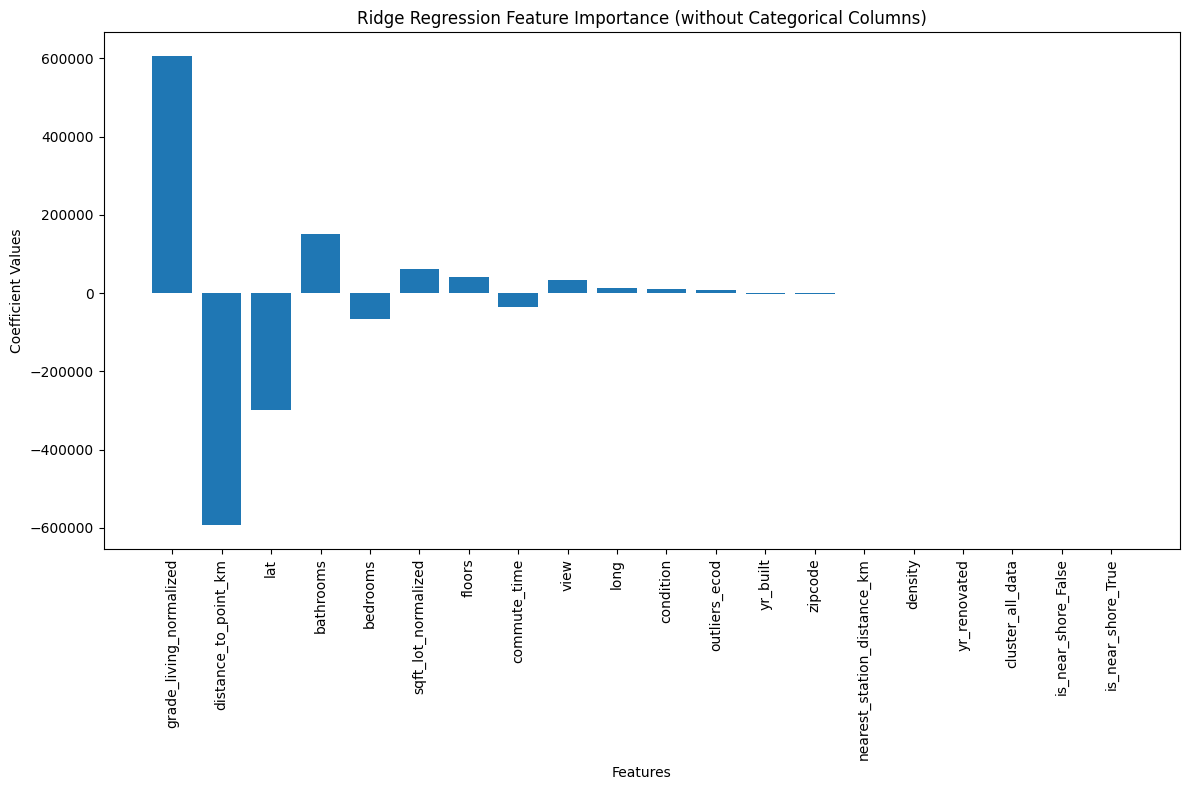

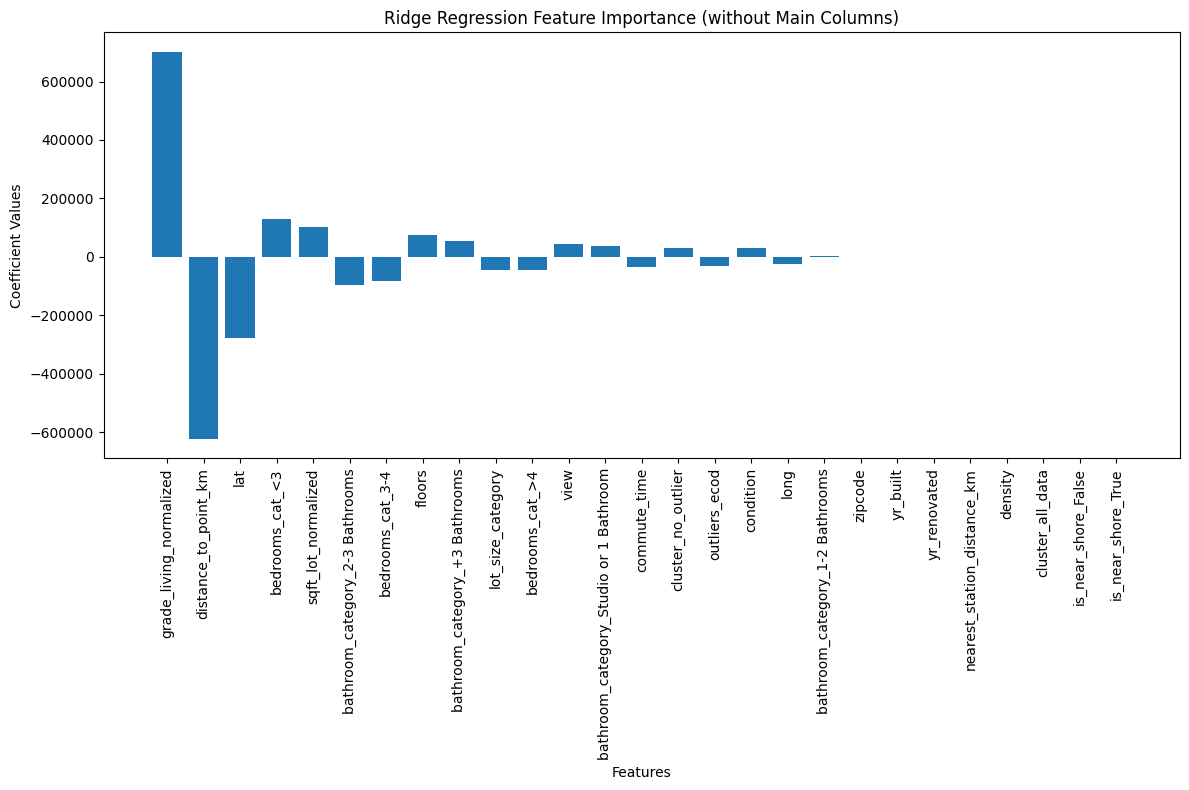

In [43]:
# Ridge Regression Feature Importance for df_wo_cat
ridge_coefficients_wo_cat = ridge_wo_cat.coef_
ridge_feature_importance_wo_cat = dict(zip(X_train_wo_cat.columns, ridge_coefficients_wo_cat))

# Ridge Regression Feature Importance for df_wo_main
ridge_coefficients_wo_main = ridge_wo_main.coef_
ridge_feature_importance_wo_main = dict(zip(X_train_wo_main.columns, ridge_coefficients_wo_main))

# Plotting
def plot_feature_importance(feature_importance, title):
    sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)
    features = [item[0] for item in sorted_features]
    coefficients = [item[1] for item in sorted_features]
    
    plt.figure(figsize=(12, 8))
    plt.bar(features, coefficients)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Values')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(ridge_feature_importance_wo_cat, 'Ridge Regression Feature Importance (without Categorical Columns)')
plot_feature_importance(ridge_feature_importance_wo_main, 'Ridge Regression Feature Importance (without Main Columns)')


# 3. Lasso Regression

In [44]:
lasso_wo_cat = Lasso()
lasso_wo_main = Lasso()

lasso_wo_cat.fit(X_train_wo_cat, y_train_wo_cat)
lasso_wo_main.fit(X_train_wo_main, y_train_wo_main)

y_pred_lasso_wo_cat = lasso_wo_cat.predict(X_test_wo_cat)
y_pred_lasso_wo_main = lasso_wo_main.predict(X_test_wo_main)

mse_lasso_wo_cat = mean_squared_error(y_test_wo_cat, y_pred_lasso_wo_cat)
r2_lasso_wo_cat = r2_score(y_test_wo_cat, y_pred_lasso_wo_cat)

mse_lasso_wo_main = mean_squared_error(y_test_wo_main, y_pred_lasso_wo_main)
r2_lasso_wo_main = r2_score(y_test_wo_main, y_pred_lasso_wo_main)

print(f"Lasso Regression without categorical columns:\nMSE: {mse_lasso_wo_cat}\nR2 Score: {r2_lasso_wo_cat}")
print(f"Lasso Regression without main columns:\nMSE: {mse_lasso_wo_main}\nR2 Score: {r2_lasso_wo_main}")


Lasso Regression without categorical columns:
MSE: 212478571929.26773
R2 Score: 0.6565461702065227
Lasso Regression without main columns:
MSE: 217599243743.74097
R2 Score: 0.648269032752955


c:\Users\jos_m\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.794e+11, tolerance: 6.618e+10
  model = cd_fast.enet_coordinate_descent(


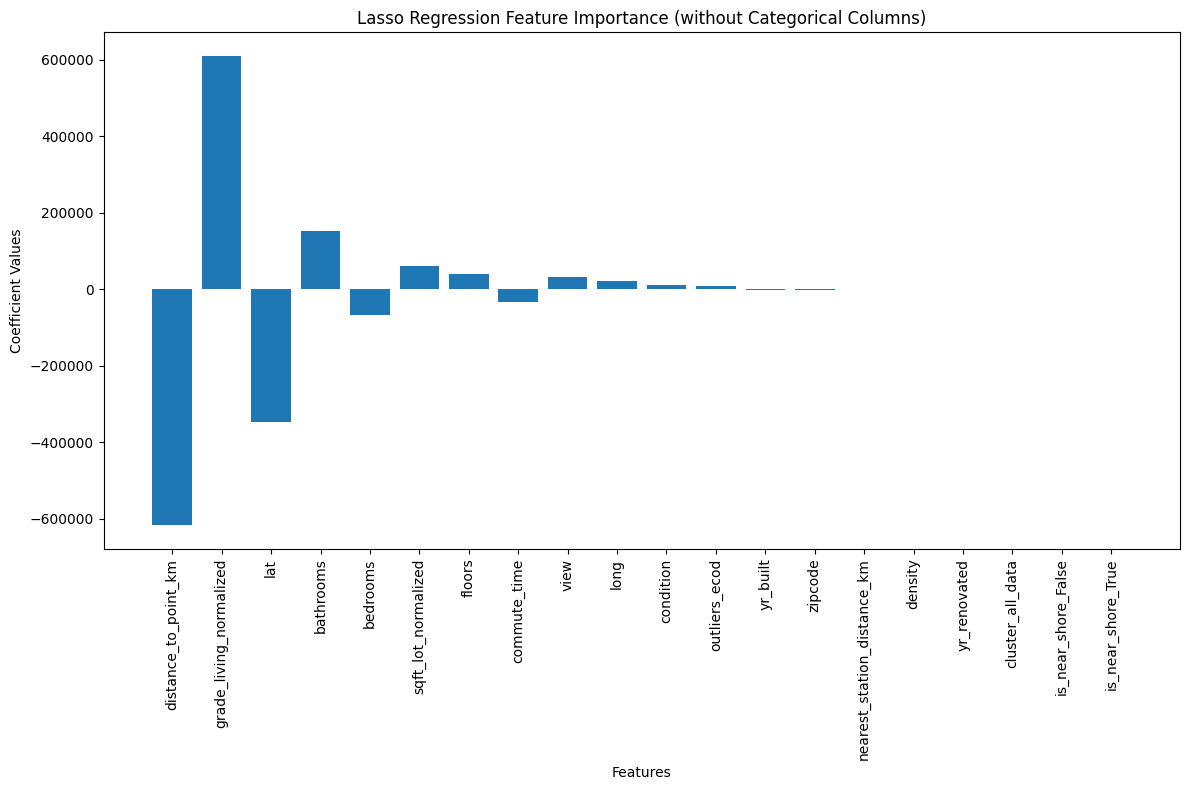

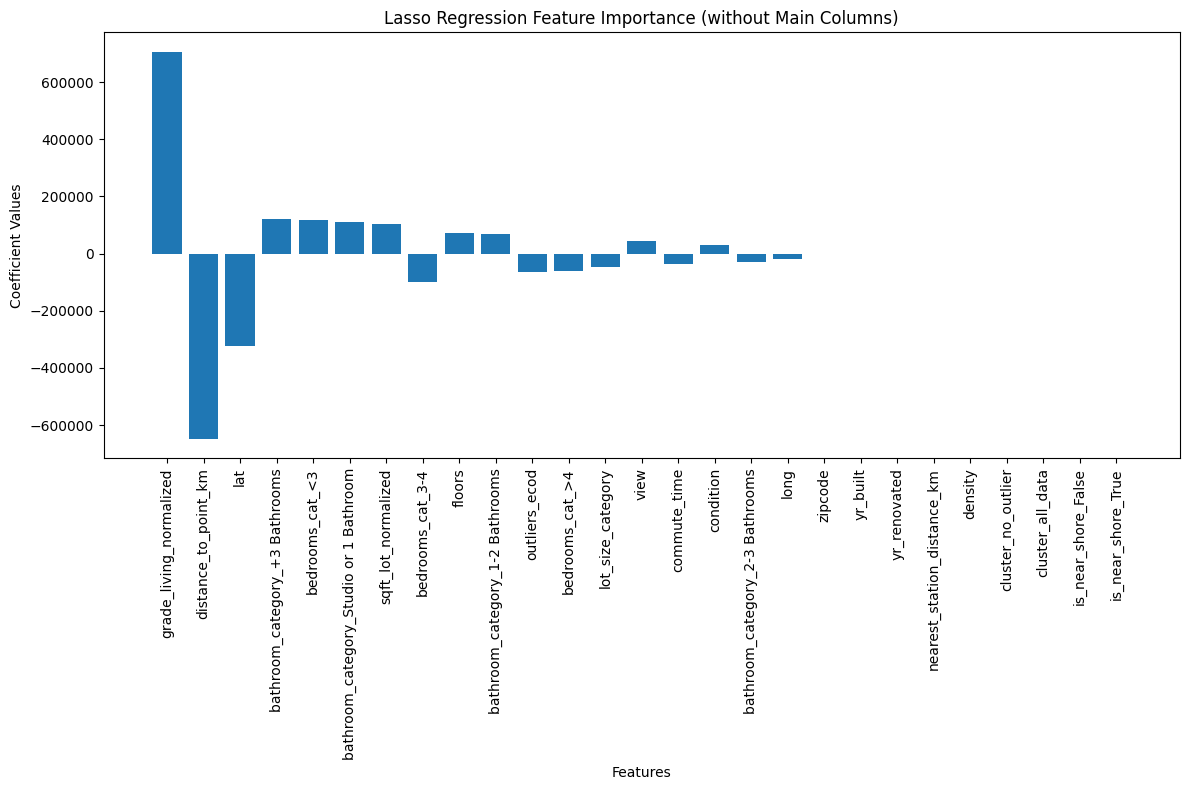

In [45]:
# Lasso Regression Feature Importance for df_wo_cat
lasso_coefficients_wo_cat = lasso_wo_cat.coef_
lasso_feature_importance_wo_cat = dict(zip(X_train_wo_cat.columns, lasso_coefficients_wo_cat))

# Lasso Regression Feature Importance for df_wo_main
lasso_coefficients_wo_main = lasso_wo_main.coef_
lasso_feature_importance_wo_main = dict(zip(X_train_wo_main.columns, lasso_coefficients_wo_main))

# Plotting
plot_feature_importance(lasso_feature_importance_wo_cat, 'Lasso Regression Feature Importance (without Categorical Columns)')
plot_feature_importance(lasso_feature_importance_wo_main, 'Lasso Regression Feature Importance (without Main Columns)')


# 4. Decision Tree

In [46]:
tree_wo_cat = DecisionTreeRegressor()
tree_wo_main = DecisionTreeRegressor()

tree_wo_cat.fit(X_train_wo_cat, y_train_wo_cat)
tree_wo_main.fit(X_train_wo_main, y_train_wo_main)

y_pred_tree_wo_cat = tree_wo_cat.predict(X_test_wo_cat)
y_pred_tree_wo_main = tree_wo_main.predict(X_test_wo_main)

mse_tree_wo_cat = mean_squared_error(y_test_wo_cat, y_pred_tree_wo_cat)
r2_tree_wo_cat = r2_score(y_test_wo_cat, y_pred_tree_wo_cat)

mse_tree_wo_main = mean_squared_error(y_test_wo_main, y_pred_tree_wo_main)
r2_tree_wo_main = r2_score(y_test_wo_main, y_pred_tree_wo_main)

print(f"Decision Tree Regression without categorical columns:\nMSE: {mse_tree_wo_cat}\nR2 Score: {r2_tree_wo_cat}")
print(f"Decision Tree Regression without main columns:\nMSE: {mse_tree_wo_main}\nR2 Score: {r2_tree_wo_main}")


Decision Tree Regression without categorical columns:
MSE: 172586993805.791
R2 Score: 0.721027567829878
Decision Tree Regression without main columns:
MSE: 135125364823.83136
R2 Score: 0.7815811560215354


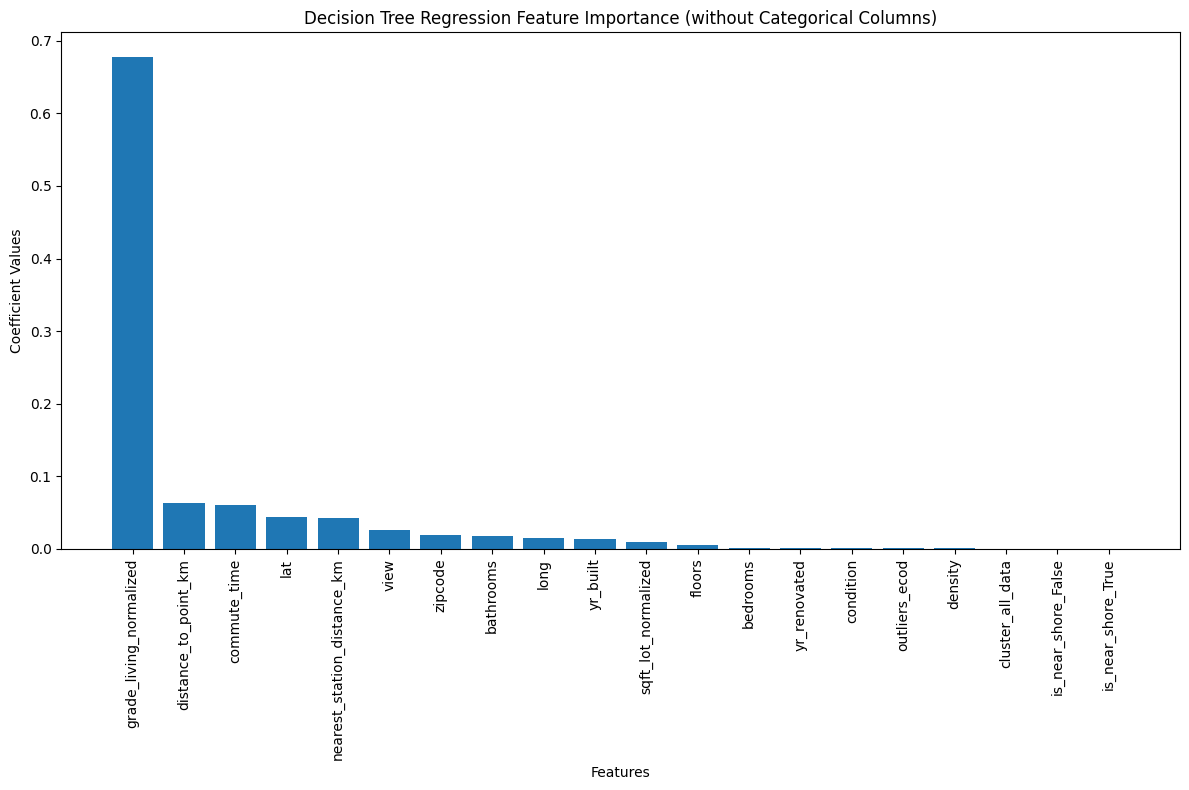

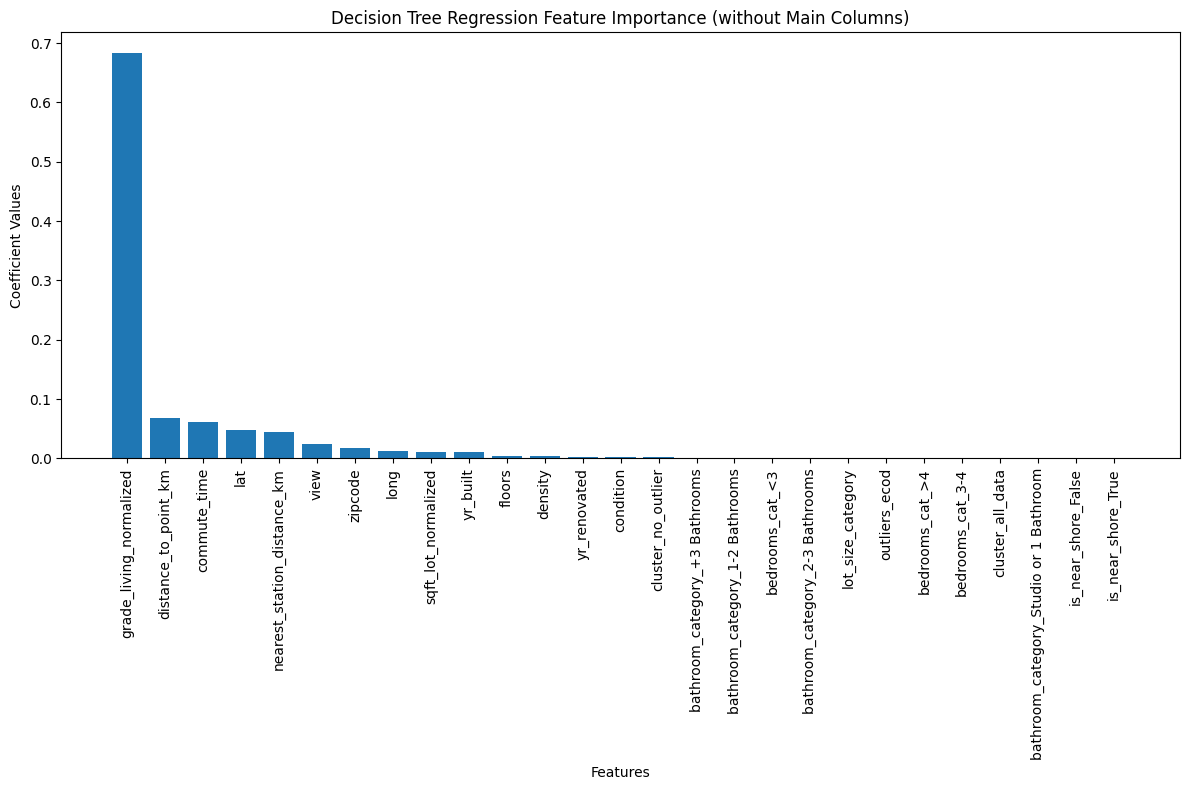

In [47]:
# Decision Tree Regression Feature Importance for df_wo_cat
tree_feature_importance_wo_cat = dict(zip(X_train_wo_cat.columns, tree_wo_cat.feature_importances_))

# Decision Tree Regression Feature Importance for df_wo_main
tree_feature_importance_wo_main = dict(zip(X_train_wo_main.columns, tree_wo_main.feature_importances_))

# Plotting
plot_feature_importance(tree_feature_importance_wo_cat, 'Decision Tree Regression Feature Importance (without Categorical Columns)')
plot_feature_importance(tree_feature_importance_wo_main, 'Decision Tree Regression Feature Importance (without Main Columns)')


# 5. Random Forest Regression

In [1]:
forest_wo_cat = RandomForestRegressor()
forest_wo_main = RandomForestRegressor()

forest_wo_cat.fit(X_train_wo_cat, y_train_wo_cat)
forest_wo_main.fit(X_train_wo_main, y_train_wo_main)

y_pred_forest_wo_cat = forest_wo_cat.predict(X_test_wo_cat)
y_pred_forest_wo_main = forest_wo_main.predict(X_test_wo_main)

mse_forest_wo_cat = mean_squared_error(y_test_wo_cat, y_pred_forest_wo_cat)
r2_forest_wo_cat = r2_score(y_test_wo_cat, y_pred_forest_wo_cat)

mse_forest_wo_main = mean_squared_error(y_test_wo_main, y_pred_forest_wo_main)
r2_forest_wo_main = r2_score(y_test_wo_main, y_pred_forest_wo_main)

print(f"Random Forest Regression without categorical columns:\nMSE: {mse_forest_wo_cat}\nR2 Score: {r2_forest_wo_cat}")
print(f"Random Forest Regression without main columns:\nMSE: {mse_forest_wo_main}\nR2 Score: {r2_forest_wo_main}")
#RMSE = 301.448

NameError: name 'RandomForestRegressor' is not defined

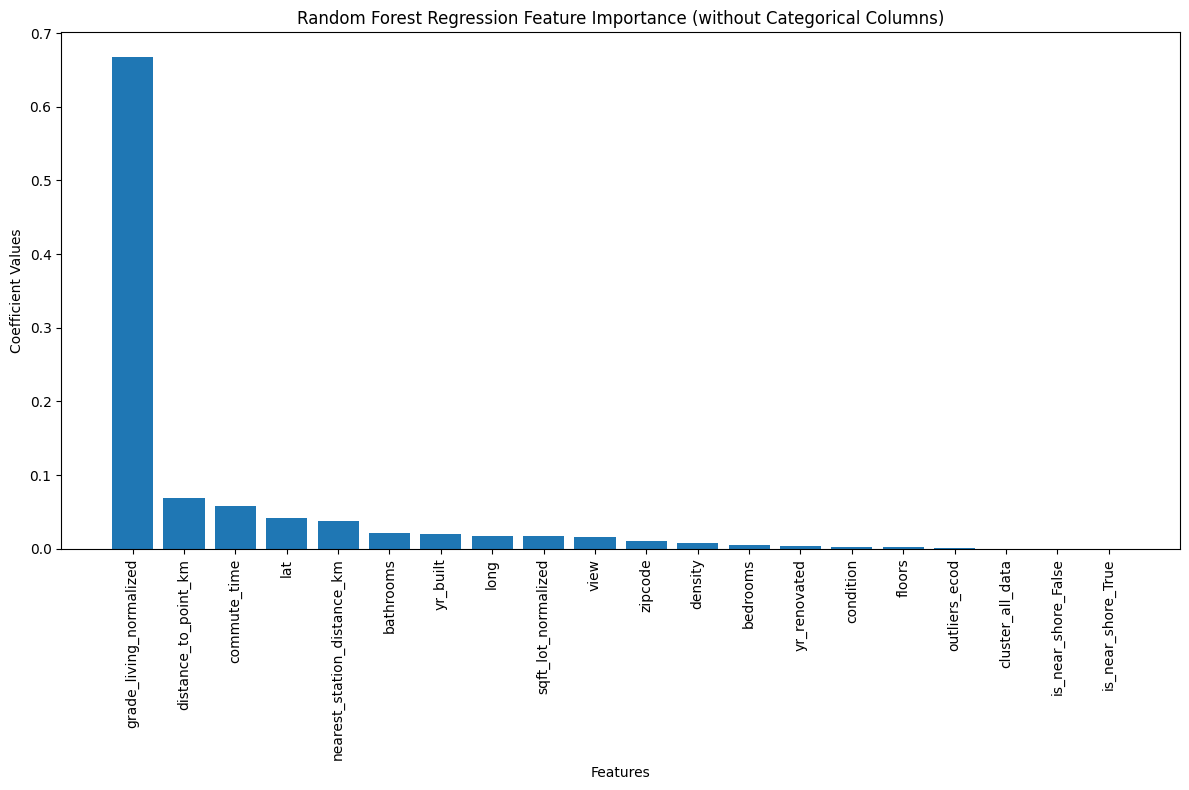

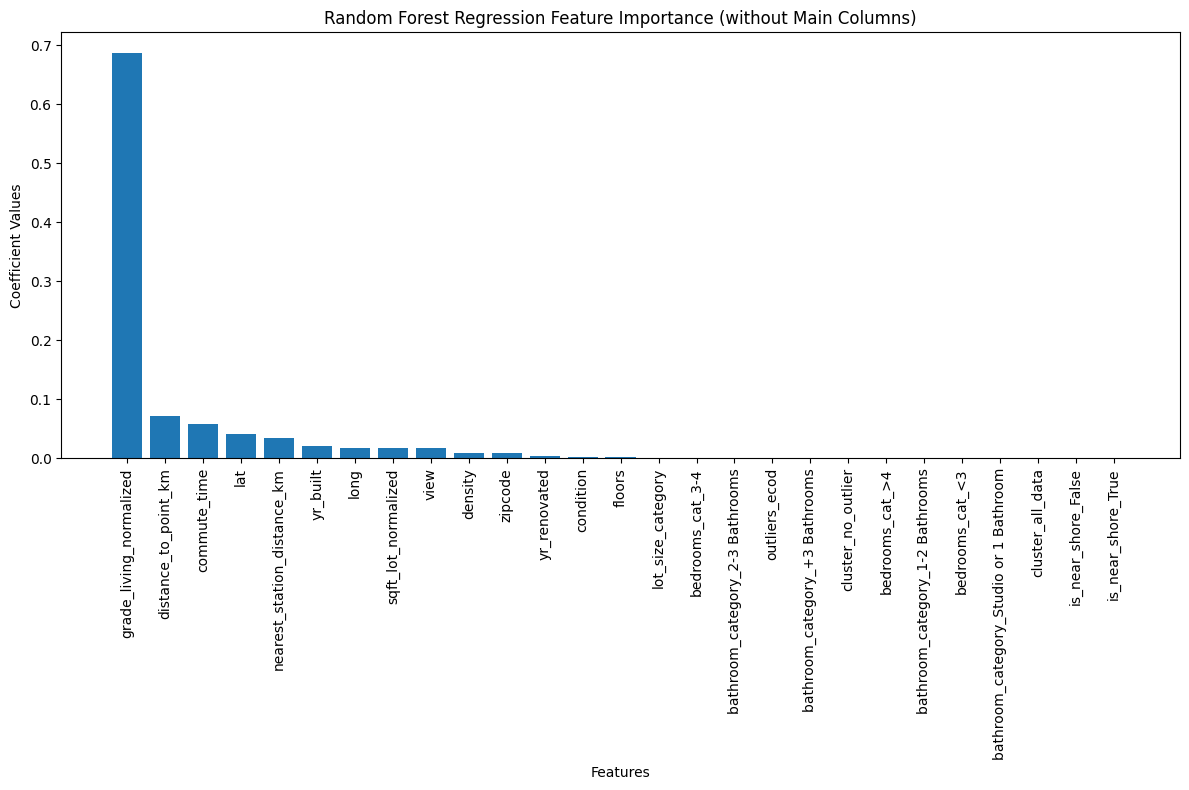

In [49]:
# Random Forest Regression Feature Importance for df_wo_cat
forest_feature_importance_wo_cat = dict(zip(X_train_wo_cat.columns, forest_wo_cat.feature_importances_))

# Random Forest Regression Feature Importance for df_wo_main
forest_feature_importance_wo_main = dict(zip(X_train_wo_main.columns, forest_wo_main.feature_importances_))

# Plotting
plot_feature_importance(forest_feature_importance_wo_cat, 'Random Forest Regression Feature Importance (without Categorical Columns)')
plot_feature_importance(forest_feature_importance_wo_main, 'Random Forest Regression Feature Importance (without Main Columns)')


# 6. Gradient Boosting Regression



In [51]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression for df_wo_cat
gbr_wo_cat = GradientBoostingRegressor()
gbr_wo_cat.fit(X_train_wo_cat, y_train_wo_cat)
y_pred_gbr_wo_cat = gbr_wo_cat.predict(X_test_wo_cat)
mse_gbr_wo_cat = mean_squared_error(y_test_wo_cat, y_pred_gbr_wo_cat)
r2_gbr_wo_cat = r2_score(y_test_wo_cat, y_pred_gbr_wo_cat)

# Gradient Boosting Regression for df_wo_main
gbr_wo_main = GradientBoostingRegressor()
gbr_wo_main.fit(X_train_wo_main, y_train_wo_main)
y_pred_gbr_wo_main = gbr_wo_main.predict(X_test_wo_main)
mse_gbr_wo_main = mean_squared_error(y_test_wo_main, y_pred_gbr_wo_main)
r2_gbr_wo_main = r2_score(y_test_wo_main, y_pred_gbr_wo_main)

print(f"Gradient Boosting Regression without categorical columns:\nMSE: {mse_gbr_wo_cat}\nR2 Score: {r2_gbr_wo_cat}")
print(f"Gradient Boosting Regression without main columns:\nMSE: {mse_gbr_wo_main}\nR2 Score: {r2_gbr_wo_main}")


Gradient Boosting Regression without categorical columns:
MSE: 96588623113.60254
R2 Score: 0.8438725739652994
Gradient Boosting Regression without main columns:
MSE: 93853601243.41365
R2 Score: 0.8482935079322219


# 7. XGBOOST

In [58]:
from xgboost import XGBRegressor

# Sütun adlarını temizleme fonksiyonu
def clean_column_names(df):
    df.columns = df.columns.str.replace('[', '', regex=False)
    df.columns = df.columns.str.replace(']', '', regex=False)
    df.columns = df.columns.str.replace('<', '', regex=False)
    return df

# Sütun adlarını temizleme (df_wo_cat ve df_wo_main için)
X_train_wo_cat = clean_column_names(X_train_wo_cat)
X_test_wo_cat = clean_column_names(X_test_wo_cat)
X_train_wo_main = clean_column_names(X_train_wo_main)
X_test_wo_main = clean_column_names(X_test_wo_main)

# XGBoost Regression for df_wo_cat
xgb_wo_cat = XGBRegressor()
xgb_wo_cat.fit(X_train_wo_cat, y_train_wo_cat)
y_pred_xgb_wo_cat = xgb_wo_cat.predict(X_test_wo_cat)
mse_xgb_wo_cat = mean_squared_error(y_test_wo_cat, y_pred_xgb_wo_cat)
r2_xgb_wo_cat = r2_score(y_test_wo_cat, y_pred_xgb_wo_cat)

# XGBoost Regression for df_wo_main
xgb_wo_main = XGBRegressor()
xgb_wo_main.fit(X_train_wo_main, y_train_wo_main)
y_pred_xgb_wo_main = xgb_wo_main.predict(X_test_wo_main)
mse_xgb_wo_main = mean_squared_error(y_test_wo_main, y_pred_xgb_wo_main)
r2_xgb_wo_main = r2_score(y_test_wo_main, y_pred_xgb_wo_main)

print(f"XGBoost Regression without categorical columns:\nMSE: {mse_xgb_wo_cat}\nR2 Score: {r2_xgb_wo_cat}")
print(f"XGBoost Regression without main columns:\nMSE: {mse_xgb_wo_main}\nR2 Score: {r2_xgb_wo_main}")

#RMSE: 304.341

XGBoost Regression without categorical columns:
MSE: 103659600966.9486
R2 Score: 0.832442930015485
XGBoost Regression without main columns:
MSE: 92623665037.51625
R2 Score: 0.8502815968791758


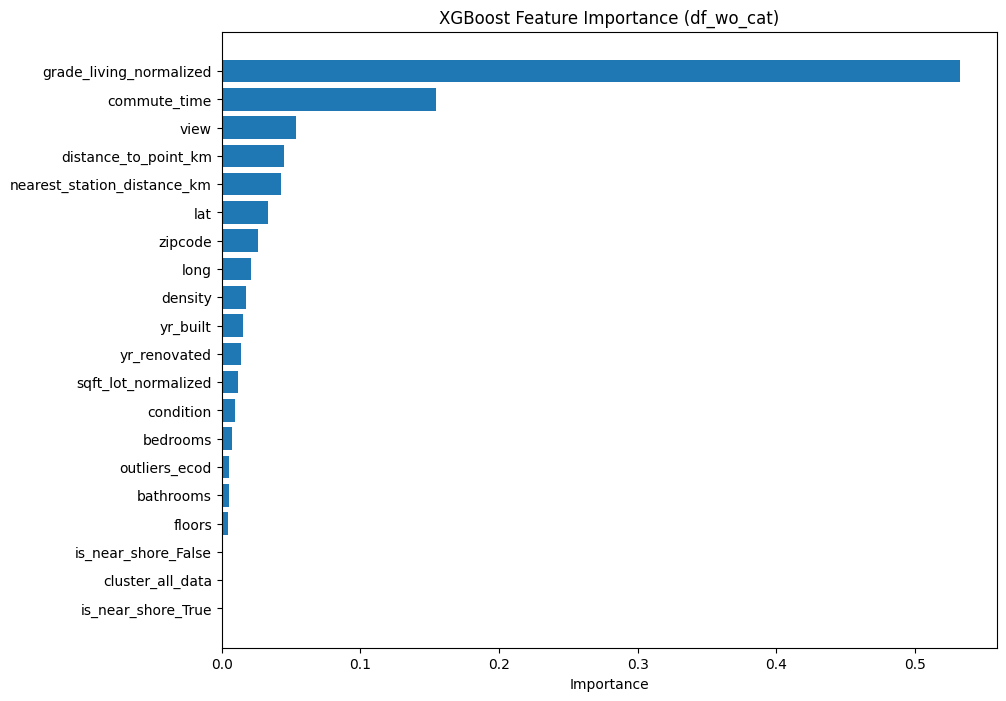

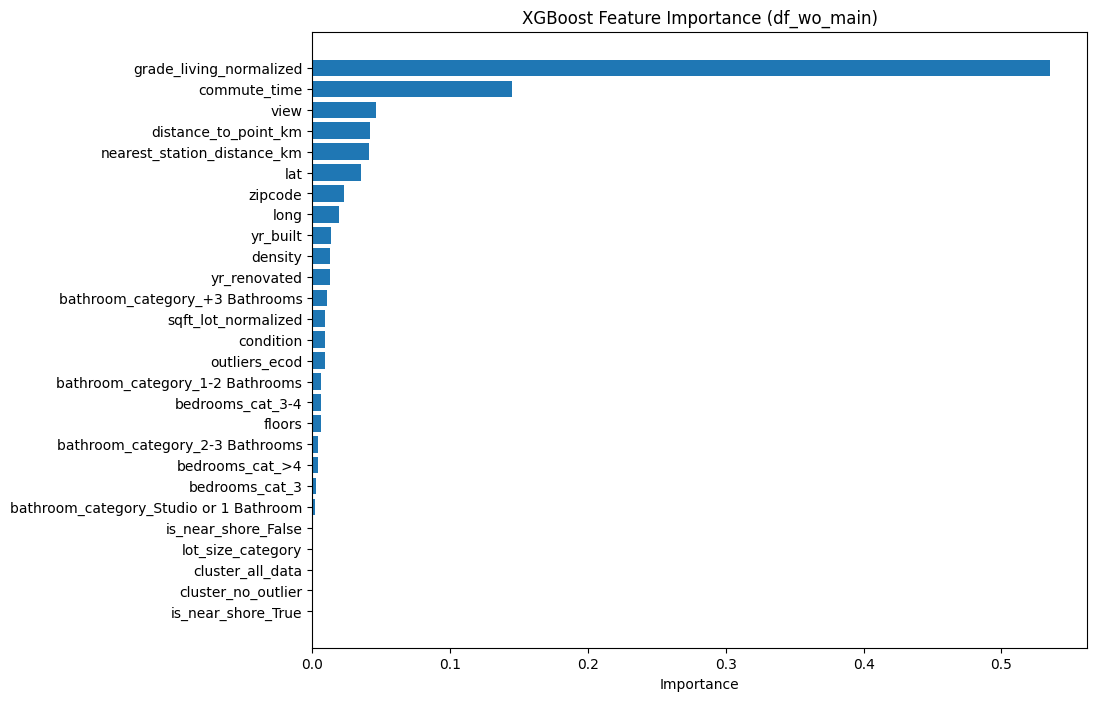

In [59]:
# XGBoost Feature Importance for df_wo_cat
importance = xgb_wo_cat.feature_importances_
features = X_train_wo_cat.columns
sorted_idx = importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(features[sorted_idx], importance[sorted_idx])
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance (df_wo_cat)')
plt.show()

# XGBoost Feature Importance for df_wo_main
importance = xgb_wo_main.feature_importances_
features = X_train_wo_main.columns
sorted_idx = importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(features[sorted_idx], importance[sorted_idx])
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance (df_wo_main)')
plt.show()


# 8 LightGBM

In [60]:
import lightgbm as lgb

# LightGBM Regression for df_wo_cat
lgb_wo_cat = lgb.LGBMRegressor()
lgb_wo_cat.fit(X_train_wo_cat, y_train_wo_cat)
y_pred_lgb_wo_cat = lgb_wo_cat.predict(X_test_wo_cat)
mse_lgb_wo_cat = mean_squared_error(y_test_wo_cat, y_pred_lgb_wo_cat)
r2_lgb_wo_cat = r2_score(y_test_wo_cat, y_pred_lgb_wo_cat)

# LightGBM Regression for df_wo_main
lgb_wo_main = lgb.LGBMRegressor()
lgb_wo_main.fit(X_train_wo_main, y_train_wo_main)
y_pred_lgb_wo_main = lgb_wo_main.predict(X_test_wo_main)
mse_lgb_wo_main = mean_squared_error(y_test_wo_main, y_pred_lgb_wo_main)
r2_lgb_wo_main = r2_score(y_test_wo_main, y_pred_lgb_wo_main)

print(f"LightGBM Regression without categorical columns:\nMSE: {mse_lgb_wo_cat}\nR2 Score: {r2_lgb_wo_cat}")
print(f"LightGBM Regression without main columns:\nMSE: {mse_lgb_wo_main}\nR2 Score: {r2_lgb_wo_main}")


c:\Users\jos_m\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jos_m\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1854
[LightGBM] [Info] Number of data points in the train set: 1683, number of used features: 17
[LightGBM] [Info] Start training from score 929705.190731
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1840
[LightGBM] [Info] Number of data points in the train set: 1683, number of used features: 23
[LightGBM] [Info] Start training from score 929705.190731
LightGBM Regression without categorical columns:
MSE: 119431850869.51414
R2 Score: 0.8069484079829328
LightGBM Regression without main columns:
MSE: 122683698206.44

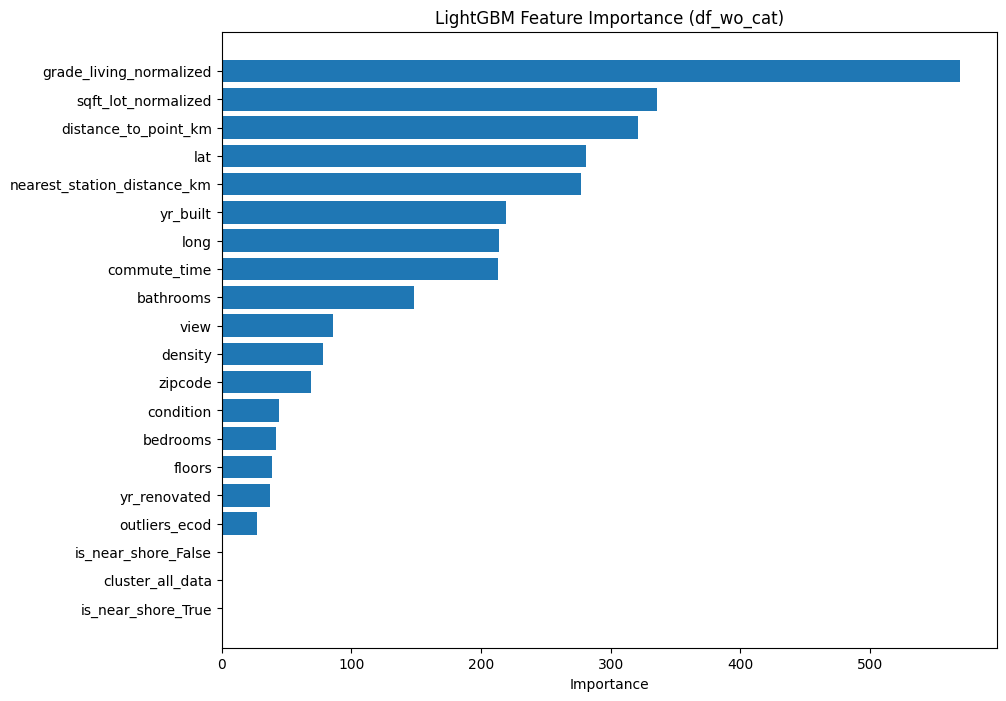

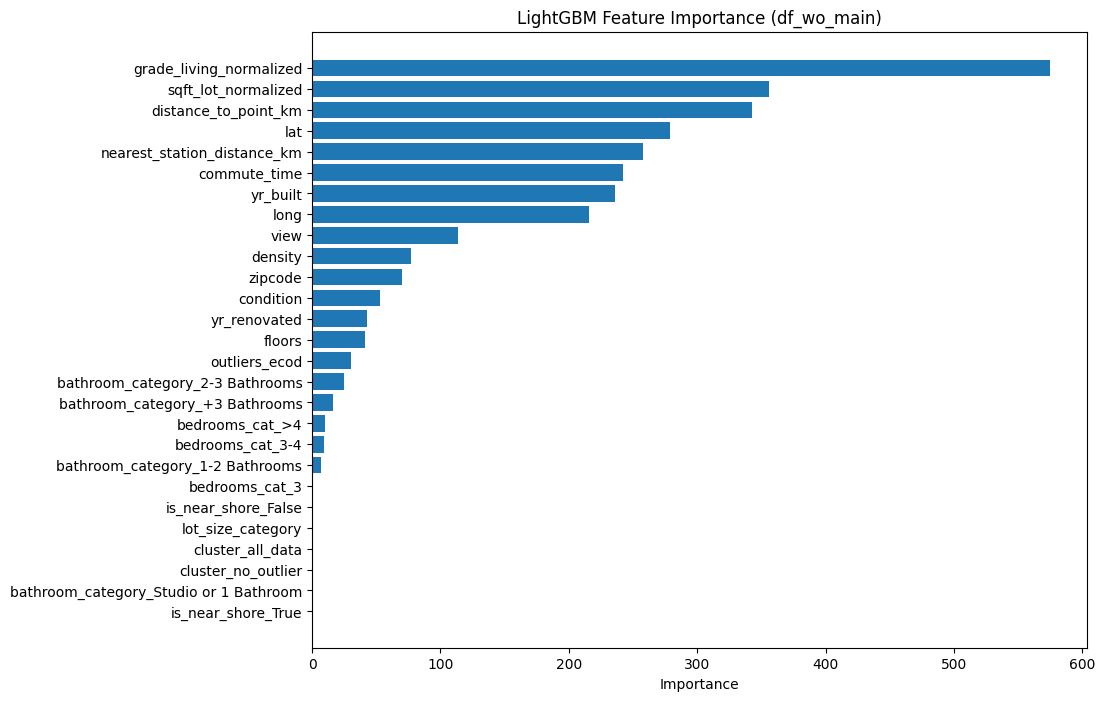

In [61]:
# LightGBM Feature Importance for df_wo_cat
importance = lgb_wo_cat.feature_importances_
features = X_train_wo_cat.columns
sorted_idx = importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(features[sorted_idx], importance[sorted_idx])
plt.xlabel('Importance')
plt.title('LightGBM Feature Importance (df_wo_cat)')
plt.show()

# LightGBM Feature Importance for df_wo_main
importance = lgb_wo_main.feature_importances_
features = X_train_wo_main.columns
sorted_idx = importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(features[sorted_idx], importance[sorted_idx])
plt.xlabel('Importance')
plt.title('LightGBM Feature Importance (df_wo_main)')
plt.show()


# 9. CatBoost

In [63]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# CatBoost Regression for df_wo_cat
catboost_wo_cat = CatBoostRegressor(verbose=0)
catboost_wo_cat.fit(X_train_wo_cat, y_train_wo_cat)
y_pred_catboost_wo_cat = catboost_wo_cat.predict(X_test_wo_cat)
mse_catboost_wo_cat = mean_squared_error(y_test_wo_cat, y_pred_catboost_wo_cat)
r2_catboost_wo_cat = r2_score(y_test_wo_cat, y_pred_catboost_wo_cat)

# CatBoost Regression for df_wo_main
catboost_wo_main = CatBoostRegressor(verbose=0)
catboost_wo_main.fit(X_train_wo_main, y_train_wo_main)
y_pred_catboost_wo_main = catboost_wo_main.predict(X_test_wo_main)
mse_catboost_wo_main = mean_squared_error(y_test_wo_main, y_pred_catboost_wo_main)
r2_catboost_wo_main = r2_score(y_test_wo_main, y_pred_catboost_wo_main)

print(f"CatBoost Regression without categorical columns:\nMSE: {mse_catboost_wo_cat}\nR2 Score: {r2_catboost_wo_cat}")
print(f"CatBoost Regression without main columns:\nMSE: {mse_catboost_wo_main}\nR2 Score: {r2_catboost_wo_main}")

# RMSE = 318.466

CatBoost Regression without categorical columns:
MSE: 108462435956.20435
R2 Score: 0.824679549191017
CatBoost Regression without main columns:
MSE: 101420833266.6382
R2 Score: 0.8360617106469056


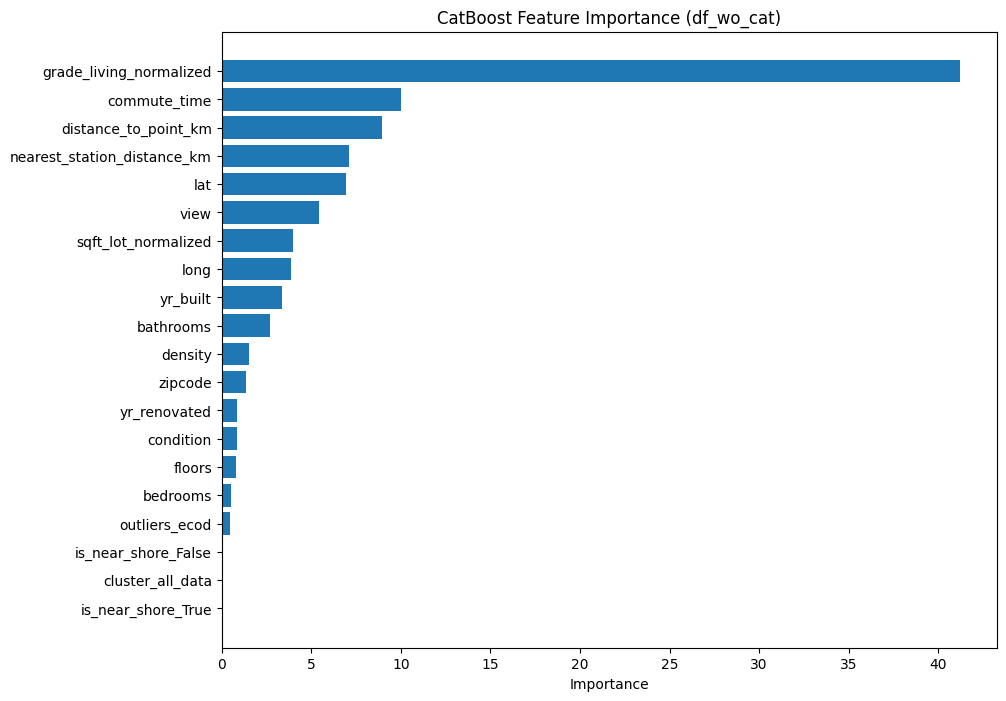

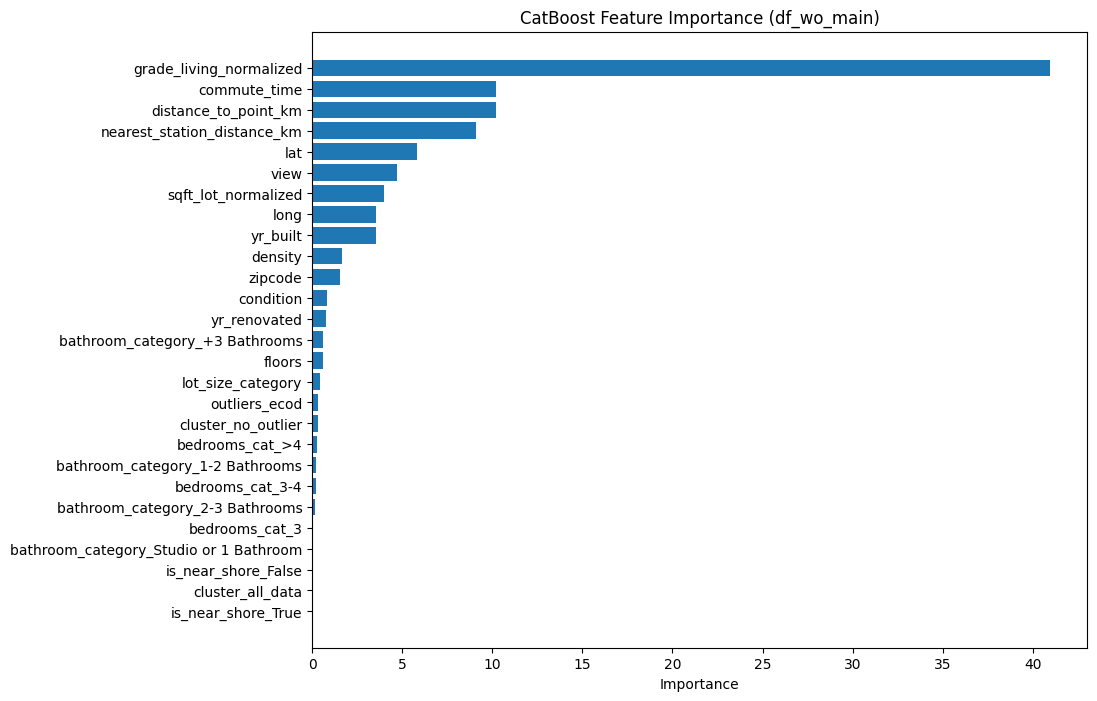

In [65]:
import matplotlib.pyplot as plt

# CatBoost Feature Importance for df_wo_cat
importance_catboost_wo_cat = catboost_wo_cat.get_feature_importance()
features_wo_cat = X_train_wo_cat.columns
sorted_idx_wo_cat = importance_catboost_wo_cat.argsort()

plt.figure(figsize=(10, 8))
plt.barh(features_wo_cat[sorted_idx_wo_cat], importance_catboost_wo_cat[sorted_idx_wo_cat])
plt.xlabel('Importance')
plt.title('CatBoost Feature Importance (df_wo_cat)')
plt.show()

# CatBoost Feature Importance for df_wo_main
importance_catboost_wo_main = catboost_wo_main.get_feature_importance()
features_wo_main = X_train_wo_main.columns
sorted_idx_wo_main = importance_catboost_wo_main.argsort()

plt.figure(figsize=(10, 8))
plt.barh(features_wo_main[sorted_idx_wo_main], importance_catboost_wo_main[sorted_idx_wo_main])
plt.xlabel('Importance')
plt.title('CatBoost Feature Importance (df_wo_main)')
plt.show()


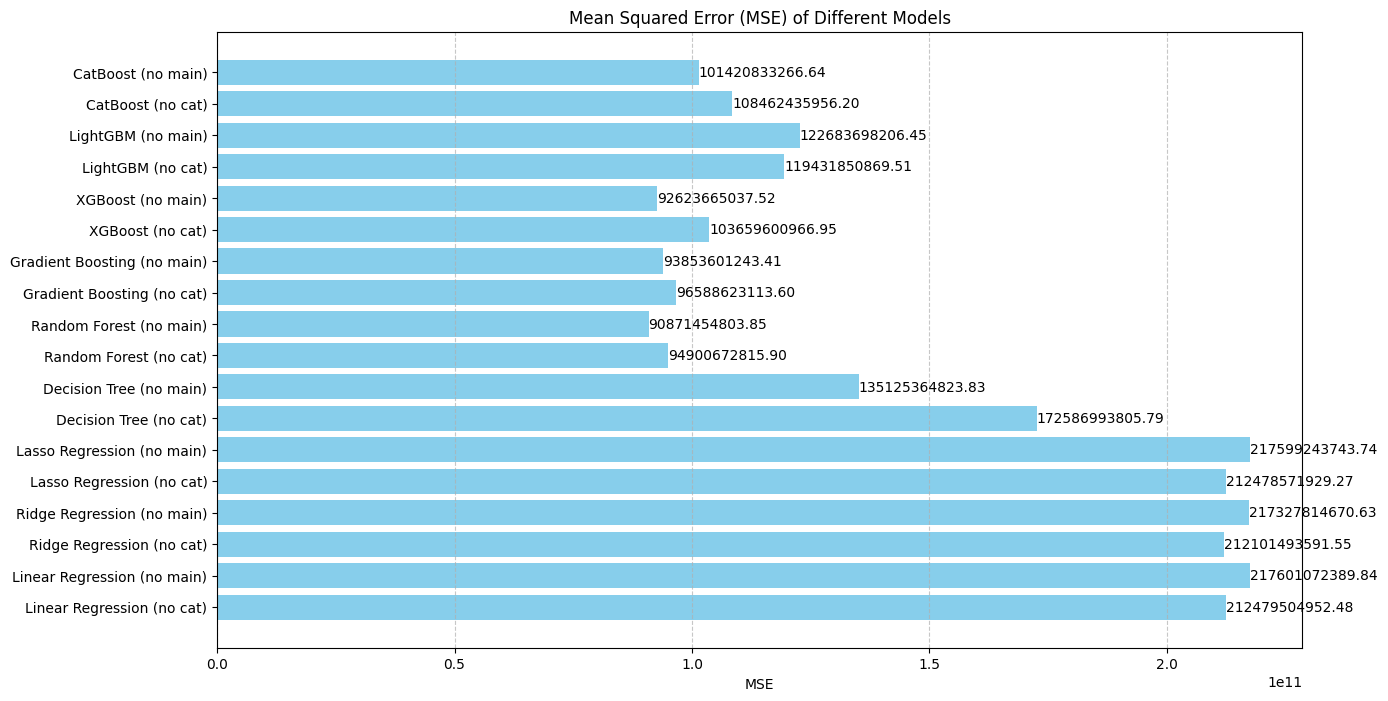

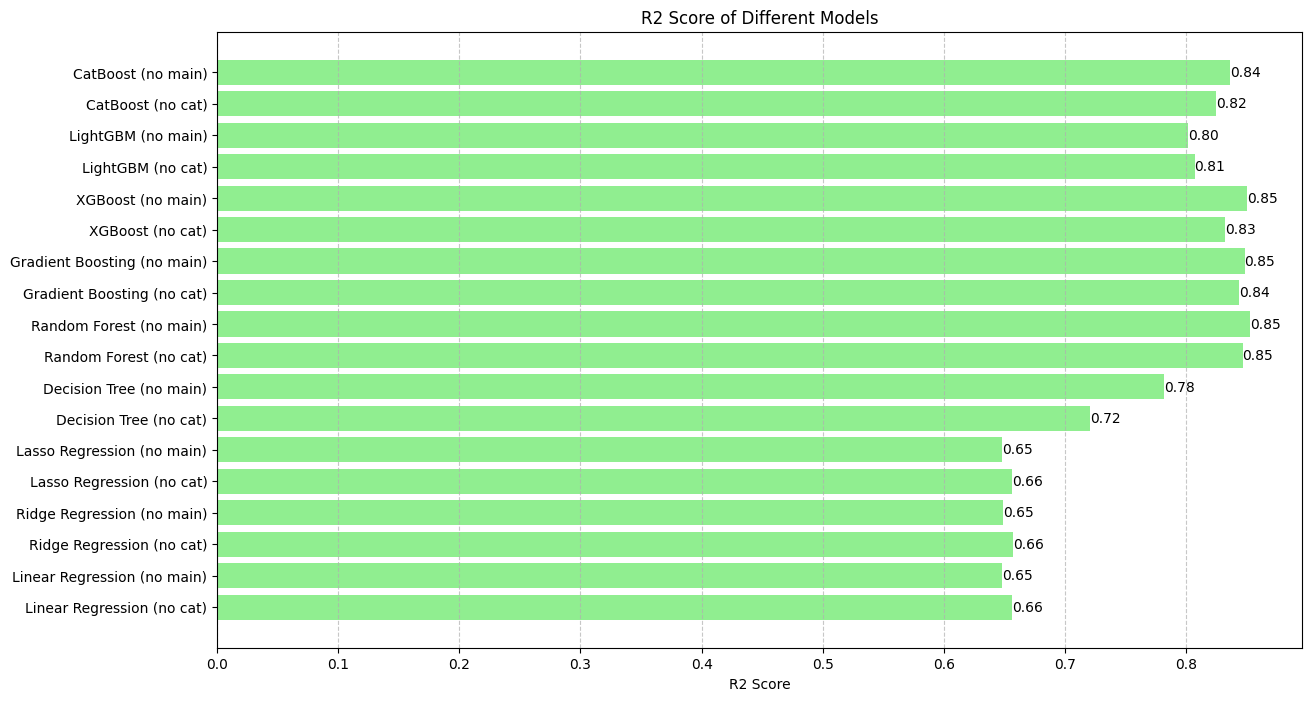

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance data
model_names = [
    "Linear Regression (no cat)", "Linear Regression (no main)",
    "Ridge Regression (no cat)", "Ridge Regression (no main)",
    "Lasso Regression (no cat)", "Lasso Regression (no main)",
    "Decision Tree (no cat)", "Decision Tree (no main)",
    "Random Forest (no cat)", "Random Forest (no main)",
    "Gradient Boosting (no cat)", "Gradient Boosting (no main)",
    "XGBoost (no cat)", "XGBoost (no main)",
    "LightGBM (no cat)", "LightGBM (no main)",
    "CatBoost (no cat)", "CatBoost (no main)"
]

mse_values = [
    mse_wo_cat, mse_wo_main,
    mse_ridge_wo_cat, mse_ridge_wo_main,
    mse_lasso_wo_cat, mse_lasso_wo_main,
    mse_tree_wo_cat, mse_tree_wo_main,
    mse_forest_wo_cat, mse_forest_wo_main,
    mse_gbr_wo_cat, mse_gbr_wo_main,
    mse_xgb_wo_cat, mse_xgb_wo_main,
    mse_lgb_wo_cat, mse_lgb_wo_main,
    mse_catboost_wo_cat, mse_catboost_wo_main
]

r2_values = [
    r2_wo_cat, r2_wo_main,
    r2_ridge_wo_cat, r2_ridge_wo_main,
    r2_lasso_wo_cat, r2_lasso_wo_main,
    r2_tree_wo_cat, r2_tree_wo_main,
    r2_forest_wo_cat, r2_forest_wo_main,
    r2_gbr_wo_cat, r2_gbr_wo_main,
    r2_xgb_wo_cat, r2_xgb_wo_main,
    r2_lgb_wo_cat, r2_lgb_wo_main,
    r2_catboost_wo_cat, r2_catboost_wo_main
]

# Plotting MSE
plt.figure(figsize=(14, 8))
bars = plt.barh(model_names, mse_values, color='skyblue')
plt.xlabel('MSE')
plt.title('Mean Squared Error (MSE) of Different Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding text labels on the bars for MSE
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

plt.show()

# Plotting R2 Score
plt.figure(figsize=(14, 8))
bars = plt.barh(model_names, r2_values, color='lightgreen')
plt.xlabel('R2 Score')
plt.title('R2 Score of Different Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding text labels on the bars for R2 Score
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

plt.show()


# Tuning

RandomForestRegressor

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Örnek bir parametre grid'i
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None,20,50],
    'min_samples_split': [10,20,50],
    'min_samples_leaf': [0.1,0.5,1]
}

# Random Forest Regressor modeli
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV için cross-validation stratejisi belirleyin
cv = 5  # 5-fold cross-validation örneği

# GridSearchCV'yi tanımlayın
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=cv, scoring={'r2': 'r2', 'neg_mean_squared_error': 'neg_mean_squared_error'}, verbose=2, n_jobs=-1, refit='r2')

# GridSearchCV'yi eğitin
grid_search_rf.fit(X_train_wo_cat, y_train_wo_cat)

# En iyi parametre setini ve en iyi performansı görüntüleyin
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best R² score found: ", grid_search_rf.best_score_)
print("Best negative MSE found: ", grid_search_rf.cv_results_['mean_test_neg_mean_squared_error'][grid_search_rf.best_index_])


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best R² score found:  0.8029222341817848
Best negative MSE found:  -77377129423.46268


XGBRegressor

In [74]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Örnek bir parametre grid'i
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 9],
    'subsample': [0.1, 0.4, 0.6],
    'colsample_bytree': [0.1, 0.3, 0.6],
    'gamma': [0, 1],
    'min_child_weight': [ 5, 7,10]
}

# XGBoost Regressor modeli
xgb_model = XGBRegressor(random_state=42)

# GridSearchCV için cross-validation stratejisi belirleyin
cv = 10  # 5-fold cross-validation örneği

# GridSearchCV'yi tanımlayın
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=cv, scoring={'r2': 'r2', 'neg_mean_squared_error': 'neg_mean_squared_error'}, verbose=2, n_jobs=-1, refit='r2')

# GridSearchCV'yi eğitin
grid_search_xgb.fit(X_train_wo_cat, y_train_wo_cat)

# En iyi parametre setini ve en iyi performansı görüntüleyin
print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best R² score found: ", grid_search_xgb.best_score_)
print("Best negative MSE found: ", grid_search_xgb.cv_results_['mean_test_neg_mean_squared_error'][grid_search_xgb.best_index_])


Fitting 10 folds for each of 486 candidates, totalling 4860 fits
Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.6}
Best R² score found:  0.8390346484294031
Best negative MSE found:  -67266257779.93225


In [75]:
X_wo_cat.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot_normalized', 'floors', 'view',
       'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'nearest_station_distance_km', 'density', 'commute_time',
       'distance_to_point_km', 'grade_living_normalized', 'outliers_ecod',
       'cluster_all_data', 'is_near_shore_False', 'is_near_shore_True'],
      dtype='object')

# Random Forest with Important Columns

In [76]:
important_features = ['grade_living_normalized', 'distance_to_point_km', 'nearest_station_distance_km', 'commute_time', 'lat',]  # Önemli özellikler
X_wo_cat_imp = X_wo_cat[important_features]
y_wo_cat_imp = y_wo_cat

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_wo_cat_imp, y_wo_cat_imp, test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = RandomForestRegressor(random_state=42)
model.fit(X_train_imp, y_train_imp)

# Tahmin yapma
y_pred_imp = model.predict(X_test_imp)

# Performans ölçütlerini hesaplama
mse_imp = mean_squared_error(y_test_imp, y_pred_imp)
r2_imp = r2_score(y_test_imp, y_pred_imp)

print(f"MSE (önemli sütunlar): {mse_imp}")
print(f"R² (önemli sütunlar): {r2_imp}")

MSE (önemli sütunlar): 101185000553.02669
R² (önemli sütunlar): 0.8364429144922864


In [77]:
forest_wo_cat = RandomForestRegressor()
forest_wo_main = RandomForestRegressor()

forest_wo_cat.fit(X_train_wo_cat, y_train_wo_cat)
forest_wo_main.fit(X_train_wo_main, y_train_wo_main)

y_pred_forest_wo_cat = forest_wo_cat.predict(X_test_wo_cat)
y_pred_forest_wo_main = forest_wo_main.predict(X_test_wo_main)

mse_forest_wo_cat = mean_squared_error(y_test_wo_cat, y_pred_forest_wo_cat)
r2_forest_wo_cat = r2_score(y_test_wo_cat, y_pred_forest_wo_cat)

mse_forest_wo_main = mean_squared_error(y_test_wo_main, y_pred_forest_wo_main)
r2_forest_wo_main = r2_score(y_test_wo_main, y_pred_forest_wo_main)

print(f"Random Forest Regression without categorical columns:\nMSE: {mse_forest_wo_cat}\nR2 Score: {r2_forest_wo_cat}")
print(f"Random Forest Regression without main columns:\nMSE: {mse_forest_wo_main}\nR2 Score: {r2_forest_wo_main}")

# RMSE = 300.106

Random Forest Regression without categorical columns:
MSE: 92901770719.18626
R2 Score: 0.8498320623186335
Random Forest Regression without main columns:
MSE: 90063830666.87209
R2 Score: 0.8544193549140302


MSE (önemli sütunlar - categorical): 101185000553.02669
R² (önemli sütunlar - categorical): 0.8364429144922864
MSE (önemli sütunlar - main): 101185000553.02669
R² (önemli sütunlar - main): 0.8364429144922864
Random Forest Regression without categorical columns:
MSE: 85411483757.9136
R2 Score: 0.861939484350619
Random Forest Regression without main columns:
MSE: 83243354845.28505
R2 Score: 0.865444083293312


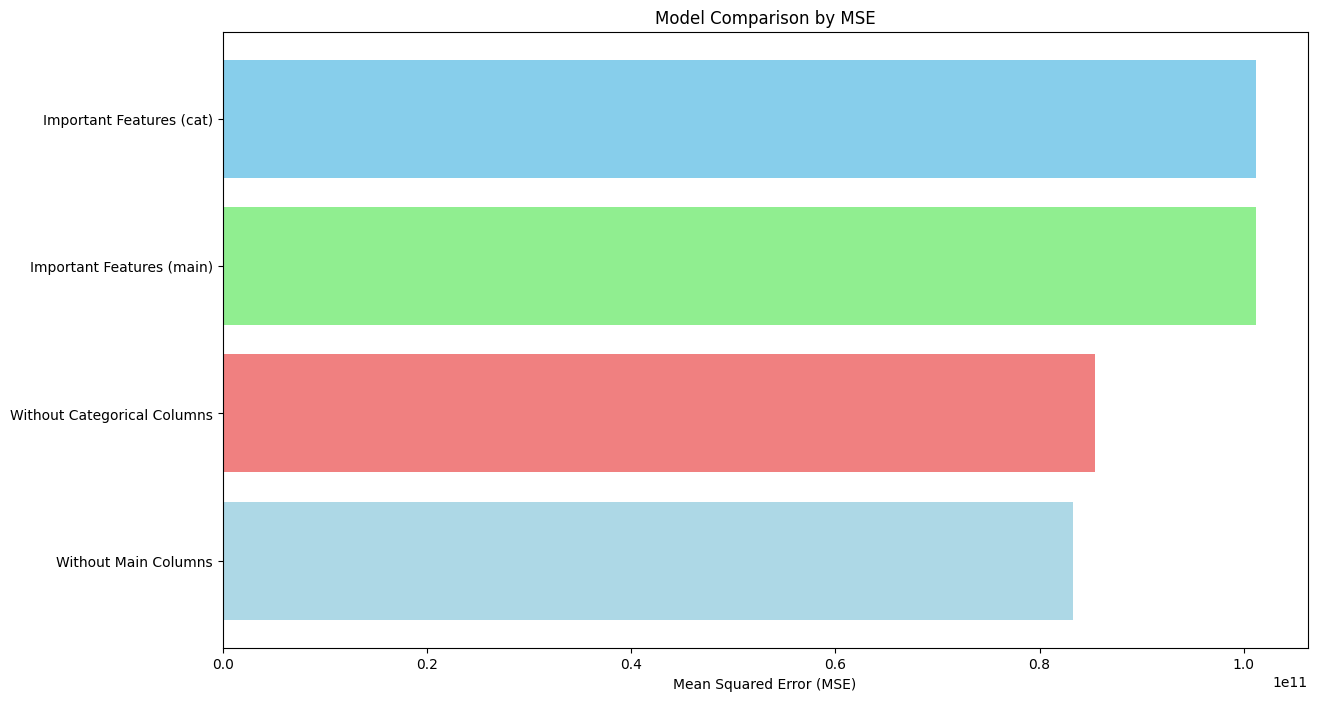

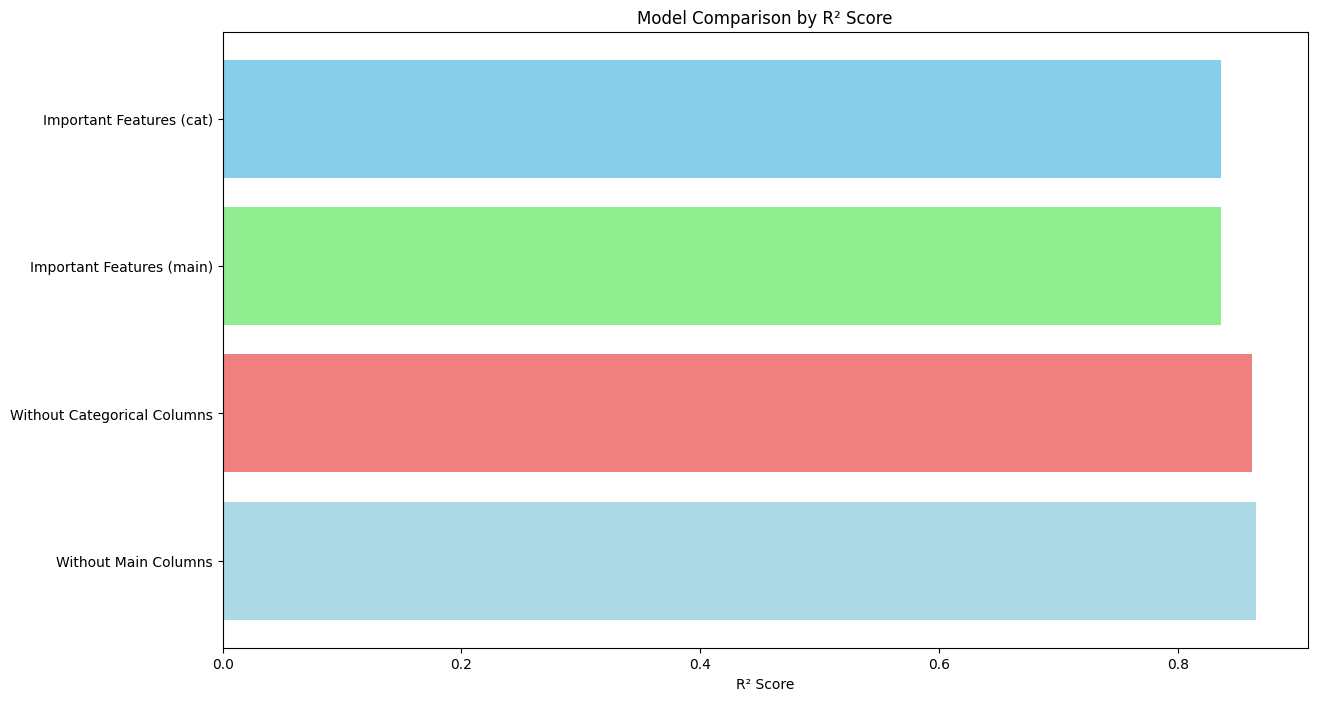

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Önemli sütunları belirleme
important_features = ['grade_living_normalized', 'distance_to_point_km', 'nearest_station_distance_km', 'commute_time', 'lat']

# Veriyi hazırlama
X_wo_cat_imp = X_wo_cat[important_features]
y_wo_cat_imp = y_wo_cat

X_wo_main_imp = X_wo_main[important_features]
y_wo_main_imp = y_wo_main

# Eğitim ve test setlerine ayırma
X_train_imp_cat, X_test_imp_cat, y_train_imp_cat, y_test_imp_cat = train_test_split(X_wo_cat_imp, y_wo_cat_imp, test_size=0.2, random_state=42)
X_train_imp_main, X_test_imp_main, y_train_imp_main, y_test_imp_main = train_test_split(X_wo_main_imp, y_wo_main_imp, test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme (önemli sütunlar ile)
model_imp_cat = RandomForestRegressor(random_state=42)
model_imp_cat.fit(X_train_imp_cat, y_train_imp_cat)

model_imp_main = RandomForestRegressor(random_state=42)
model_imp_main.fit(X_train_imp_main, y_train_imp_main)

# Tahmin yapma (önemli sütunlar ile)
y_pred_imp_cat = model_imp_cat.predict(X_test_imp_cat)
y_pred_imp_main = model_imp_main.predict(X_test_imp_main)

# Performans ölçütlerini hesaplama (önemli sütunlar ile)
mse_imp_cat = mean_squared_error(y_test_imp_cat, y_pred_imp_cat)
r2_imp_cat = r2_score(y_test_imp_cat, y_pred_imp_cat)

mse_imp_main = mean_squared_error(y_test_imp_main, y_pred_imp_main)
r2_imp_main = r2_score(y_test_imp_main, y_pred_imp_main)

print(f"MSE (önemli sütunlar - categorical): {mse_imp_cat}")
print(f"R² (önemli sütunlar - categorical): {r2_imp_cat}")

print(f"MSE (önemli sütunlar - main): {mse_imp_main}")
print(f"R² (önemli sütunlar - main): {r2_imp_main}")

# Random Forest modeli tüm sütunlar olmadan eğitme
forest_wo_cat = RandomForestRegressor(random_state=42)
forest_wo_main = RandomForestRegressor(random_state=42)

forest_wo_cat.fit(X_train_wo_cat, y_train_wo_cat)
forest_wo_main.fit(X_train_wo_main, y_train_wo_main)

y_pred_forest_wo_cat = forest_wo_cat.predict(X_test_wo_cat)
y_pred_forest_wo_main = forest_wo_main.predict(X_test_wo_main)

mse_forest_wo_cat = mean_squared_error(y_test_wo_cat, y_pred_forest_wo_cat)
r2_forest_wo_cat = r2_score(y_test_wo_cat, y_pred_forest_wo_cat)

mse_forest_wo_main = mean_squared_error(y_test_wo_main, y_pred_forest_wo_main)
r2_forest_wo_main = r2_score(y_test_wo_main, y_pred_forest_wo_main)

print(f"Random Forest Regression without categorical columns:\nMSE: {mse_forest_wo_cat}\nR2 Score: {r2_forest_wo_cat}")
print(f"Random Forest Regression without main columns:\nMSE: {mse_forest_wo_main}\nR2 Score: {r2_forest_wo_main}")

# Performans ölçütlerini grafikle gösterme
model_names = ["Important Features (cat)", "Important Features (main)", "Without Categorical Columns", "Without Main Columns"]

mse_scores = [mse_imp_cat, mse_imp_main, mse_forest_wo_cat, mse_forest_wo_main]
r2_scores = [r2_imp_cat, r2_imp_main, r2_forest_wo_cat, r2_forest_wo_main]

# MSE Skorları İçin Grafik
plt.figure(figsize=(14, 8))
plt.barh(model_names, mse_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'lightblue'])
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Model Comparison by MSE')
plt.gca().invert_yaxis()  # Y eksenini tersine çevir
plt.show()

# R² Skorları İçin Grafik
plt.figure(figsize=(14, 8))
plt.barh(model_names, r2_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'lightblue'])
plt.xlabel('R² Score')
plt.title('Model Comparison by R² Score')
plt.gca().invert_yaxis()  # Y eksenini tersine çevir
plt.show()
